# Preprocessing - Test Notebook

Notebook for testing individual steps of our data preprocessing approach on a small subset of the original dataset. This will allow us to check if our code works as expected, and to identify any potential errors or areas for improvement. 

## Steps in Data Preprocessing
1. Sorting 
2. Checking for Negative Values
3. Replacing Missing Values
4. Identifying and Replacing Outliers

## Issues Identified

## Standard Imports

In [1]:
import numpy as np
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline 

# Seaborn is used for distribution plots
from seaborn import distplot

## Importing Data 

The data being imported in this case is the original, raw data from [Hong Ning Dai's GitHub Repository](https://github.com/henryRDlab/ElectricityTheftDetection). 
- Data was made available as three zip files (`data.zip`, `data.z01`, `data.z02`).
- Instructions on the README said we should download all three zip files and unzip them together.
    - Faiq was responsible for this 

In [4]:
raw_data = pd.read_csv('./Data/data.csv')

In [5]:
# Examining the head
raw_data.head()

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31


In [6]:
raw_data.describe()

,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
count,42372.000000,25870.000000,25912.000000,25911.000000,25912.00000,25912.000000,25912.000000,25915.000000,25924.000000,25925.000000,...,40544.000000,41482.000000,41915.000000,41151.000000,41906.000000,41873.000000,41850.000000,41967.000000,42044.000000,42027.00000
mean,0.085316,7.168735,6.954202,6.784099,7.08430,10.516470,7.219633,7.341512,7.160004,6.839875,...,8.836129,9.304656,10.758718,9.942215,11.173498,11.482926,11.656425,11.322680,11.015589,10.69165
std,0.279354,34.131237,40.017856,38.327058,31.98716,576.388348,34.703617,36.569049,36.916957,30.235396,...,52.371956,57.063621,88.039832,62.010381,94.267851,100.971180,118.369381,103.891111,100.614909,107.25814
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.660000,0.820000,0.880000,0.880000,0.900000,0.920000,0.940000,0.910000,0.910000,0.90000
50%,0.000000,3.310000,2.870000,2.900000,3.35000,3.440000,3.295000,3.470000,3.130000,3.250000,...,4.380000,4.670000,5.010000,4.820000,5.150000,5.110000,5.190000,5.110000,5.020000,4.93000
75%,0.000000,8.910000,8.170000,8.210000,8.76000,8.620000,8.740000,8.900000,8.780000,8.520000,...,9.300000,9.380000,10.740000,9.700000,11.380000,11.430000,11.600000,11.300000,10.730000,10.28000
max,1.000000,3318.000000,3966.000000,4392.000000,3414.00000,92713.900000,3167.000000,3960.000000,3654.000000,3306.000000,...,6324.000000,6990.000000,14640.000000,6672.000000,16320.000000,17100.000000,21210.000000,17940.000000,16710.000000,18570.00000


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42372 entries, 0 to 42371
Columns: 1036 entries, CONS_NO to 2016/9/9
dtypes: float64(1034), int64(1), object(1)
memory usage: 334.9+ MB


## Extracting Subset of Data

### Defining Subset Indices

In [8]:
NUM_ROWS, NUM_COLS = raw_data.shape

In [9]:
# Defining bounds for the rows in the subset
START_ROW_IDX = 0
NUM_CONSUMERS = 15
END_ROW_IDX = START_ROW_IDX + NUM_CONSUMERS

# Defining bounds for the columns in the dataset
START_COL_IDX = 0
START_KWHS_IDX = 2     # Days begin at index 2
NUM_DAYS = 1034        # If I change this to 1,035, I get an assertion error for end col idx
END_COL_IDX = START_COL_IDX + START_KWHS_IDX + NUM_DAYS

# Assert no index out of bounds
assert START_ROW_IDX >= 0
assert END_ROW_IDX <= NUM_ROWS
assert START_COL_IDX >= 0
assert END_COL_IDX <= NUM_COLS

### Extracting Subset Based on Indices

In [10]:
subset_df = raw_data.iloc[START_ROW_IDX : END_ROW_IDX, 
                         START_COL_IDX : END_COL_IDX]

In [11]:
subset_df.head()

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31


In [12]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Columns: 1036 entries, CONS_NO to 2016/9/9
dtypes: float64(1034), int64(1), object(1)
memory usage: 121.5+ KB


In [13]:
subset_df.describe()

,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
count,15.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,13.000000,13.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,1.0,3.150000,3.271429,3.211429,2.495714,3.212857,2.524286,2.167143,2.781429,2.950000,...,10.798462,10.543077,14.859286,9.705714,17.062857,15.252857,14.471429,14.014286,13.557143,12.199286
std,0.0,3.914103,3.499812,3.504670,2.848045,2.922566,2.616460,2.988777,2.747668,2.967586,...,13.856248,13.911979,28.987421,15.652783,29.895062,27.756332,22.827314,22.262323,20.832976,20.826512
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.510000,0.695000,0.760000,0.585000,1.415000,0.760000,0.315000,1.065000,1.270000,...,2.820000,2.820000,2.490000,3.145000,3.352500,2.885000,3.047500,2.860000,3.597500,2.687500
50%,1.0,1.910000,1.820000,1.100000,1.330000,1.970000,1.340000,1.180000,1.710000,2.090000,...,6.000000,5.520000,5.340000,4.375000,5.850000,5.420000,4.550000,4.940000,5.085000,5.325000
75%,1.0,4.050000,5.725000,5.875000,3.525000,4.690000,3.710000,2.545000,3.790000,3.535000,...,16.740000,10.370000,14.680000,8.345000,19.670000,15.465000,16.217500,17.272500,17.745000,13.627500
max,1.0,11.020000,8.240000,8.110000,7.920000,8.310000,7.390000,8.270000,8.050000,8.950000,...,51.360000,52.390000,113.350000,60.890000,115.620000,108.690000,87.880000,86.360000,81.510000,81.750000


## Sorting Data
Data is clearly not in chronological order. Sorting using the following workflow
1. Separate the kWh columns from the `FLAG` and `CONS_NO` columns.
2. Convert the columns in the `kWhs` dataframe from `str` to `datetime` objects.
3. Sort the columns in the `kWhs` dataframe in chronological order.
4. Join the sorted `kWhs` dataframe with the `CONS_NO` and `FLAG` columns.

In [14]:
# Separating the consumer number and flags
cons_flag_df = subset_df.iloc[:, :2]

# kWhs will be sorted
kWhs_df = subset_df.iloc[:, 2:]

In [15]:
# Examine the kWhs dataframe
kWhs_df.head()

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31


The columns are not in order. Should be 2014/1/1, 2014/1/2, 2014/1/3,... and so on. 

In [16]:
# Extracting first 15 columns prior to sorting 
first_few_columns_presort = kWhs_df.iloc[:, :15]

In [17]:
first_few_columns_presort

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,2014/1/19,2014/1/2,2014/1/20,2014/1/21,2014/1/22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.90,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,0.88,5.64,3.81,6.51,9.19
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.11,0.53,0.45,0.51,1.32,0.71,0.12,0.52,0.55,0.74,0.92,0.11,1.37,1.81,1.12
7,0.91,0.86,1.10,0.66,5.82,3.17,1.18,4.05,3.66,3.21,4.83,1.16,5.92,3.99,1.45
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11.02,8.24,7.94,7.92,8.31,7.39,8.27,8.05,8.95,8.32,6.41,7.92,7.11,7.14,7.20


In [18]:
# The data type for the first few columns  - all strings
[type(column) for column in first_few_columns_presort.columns.tolist()]

[str, str, str, str, str, str, str, str, str, str, str, str, str, str, str]

In [19]:
# Converting the columns in the dataframe to datetime objects
kWhs_df.columns = pd.to_datetime(kWhs_df.columns).date # .date ensures we don't have to deal with timestamp

In [20]:
kWhs_df.head()

,2014-01-01,2014-01-10,2014-01-11,2014-01-12,2014-01-13,2014-01-14,2014-01-15,2014-01-16,2014-01-17,2014-01-18,...,2016-09-28,2016-09-29,2016-09-03,2016-09-30,2016-09-04,2016-09-05,2016-09-06,2016-09-07,2016-09-08,2016-09-09
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31


Now the dataframe's columns have been converted to `2014-01-01`. Confirming that these are `datetime` objects which can be sorted chronologically.

In [21]:
[type(col) for col in kWhs_df.columns.tolist()][:15]

[datetime.date,
 datetime.date,
 datetime.date,
 datetime.date,
 datetime.date,
 datetime.date,
 datetime.date,
 datetime.date,
 datetime.date,
 datetime.date,
 datetime.date,
 datetime.date,
 datetime.date,
 datetime.date,
 datetime.date]

In [22]:
# Sorting by index on the first few cols (prior to conversion to datetime)
first_few_columns_presort.sort_index(axis=1, ascending=True)

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,2014/1/19,2014/1/2,2014/1/20,2014/1/21,2014/1/22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.90,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,0.88,5.64,3.81,6.51,9.19
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.11,0.53,0.45,0.51,1.32,0.71,0.12,0.52,0.55,0.74,0.92,0.11,1.37,1.81,1.12
7,0.91,0.86,1.10,0.66,5.82,3.17,1.18,4.05,3.66,3.21,4.83,1.16,5.92,3.99,1.45
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11.02,8.24,7.94,7.92,8.31,7.39,8.27,8.05,8.95,8.32,6.41,7.92,7.11,7.14,7.20


In [23]:
first_few_columns_presort.head(15)

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,2014/1/19,2014/1/2,2014/1/20,2014/1/21,2014/1/22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.90,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,0.88,5.64,3.81,6.51,9.19
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.11,0.53,0.45,0.51,1.32,0.71,0.12,0.52,0.55,0.74,0.92,0.11,1.37,1.81,1.12
7,0.91,0.86,1.10,0.66,5.82,3.17,1.18,4.05,3.66,3.21,4.83,1.16,5.92,3.99,1.45
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11.02,8.24,7.94,7.92,8.31,7.39,8.27,8.05,8.95,8.32,6.41,7.92,7.11,7.14,7.20


In [24]:
np.all(first_few_columns_presort.columns == first_few_columns_presort.sort_index(axis=1, ascending=True).columns)

True

The line of code in the previous cell checks that there is no change in the ordering of columns if the dataset is sorted according to the columns without converting the columns from strings to `datetime` objects.

This confirms my assumption that the columns in the dataset have been sorted as `strings` instead of chronological `datetime` objects.

In [25]:
# What happens when I convert column names to datetimes, then sort?
kWhs_df_sorted = kWhs_df.sort_index(axis=1, ascending=True)

In [26]:
kWhs_df_sorted.head()

,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72


### Merging Sorted kWhs with `CONS_NO` and `FLAG`

In [27]:
# Adding the `CONS_NO` column to the `kWhs_df_sorted` dataframe as key for join
kWhs_df_sorted.insert(0, 'CONS_NO', subset_df[['CONS_NO']])

In [28]:
kWhs_df_sorted.head()

,CONS_NO,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,B32AC8CC6D5D805AC053557AB05F5343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,EDFC78B07BA2908B3395C4EB2304665E,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72


In [29]:
sorted_df = pd.merge(left=cons_flag_df, right=kWhs_df_sorted, how='left', 
                    on='CONS_NO', left_index=True, right_index=False)

In [30]:
sorted_df.head()

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72


### Comparing kWhs on dates before and after sorting

In [31]:
first_few_columns_presort.head()

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,2014/1/19,2014/1/2,2014/1/20,2014/1/21,2014/1/22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,0.88,5.64,3.81,6.51,9.19


In [32]:
first_few_columns_presort.iloc[4, 1:11]

2014/1/10    3.42
2014/1/11    3.81
2014/1/12    4.58
2014/1/13    3.56
2014/1/14    4.25
2014/1/15    3.86
2014/1/16    3.53
2014/1/17    3.41
2014/1/18    0.85
2014/1/19    0.88
Name: 4, dtype: float64

In [33]:
sorted_df.head().iloc[:, :20]

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,2014-01-11,2014-01-12,2014-01-13,2014-01-14,2014-01-15,2014-01-16,2014-01-17,2014-01-18
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85


In [34]:
sorted_df.head().iloc[4, 11:21]

2014-01-10    3.42
2014-01-11    3.81
2014-01-12    4.58
2014-01-13    3.56
2014-01-14    4.25
2014-01-15    3.86
2014-01-16    3.53
2014-01-17    3.41
2014-01-18    0.85
2014-01-19    0.88
Name: 4, dtype: object

Through manual inspection, I have confirmed that the kWh values for consumer number `4` before sorting on the dates from 10/1/2014 to 19/1/2014 (available in the `first_few_columns_presort` dataframe) are unchanged for the consumer AFTER they have been sorted. This confirms that
- the sorting has been done on a column-wise basis, not a row-wise basis.
- kWhs of a consumer are not swapped with those of other consumers. 

In [35]:
np.any(sorted_df.head().iloc[4, 11:21].values == first_few_columns_presort.head().iloc[4, 1:11].values)

True

In [283]:
sorted_df.to_csv('./sorted_data.csv', index=False)

The line in the previous cell confirms that the precision of values has not been affected by the sorting process either.

## Missing Values

In [36]:
sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Columns: 1036 entries, CONS_NO to 2016-10-31
dtypes: float64(1034), int64(1), object(1)
memory usage: 121.5+ KB


In [37]:
sorted_df.head()

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72


In [38]:
sorted_df.describe()

,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
count,15.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.0,3.150000,2.755714,2.951429,2.532857,2.538571,3.262857,2.598571,2.147143,2.831429,...,10.199333,13.106000,10.104667,9.251333,9.360667,10.315333,10.260000,9.372000,9.024667,7.758000
std,0.0,3.914103,2.963966,3.382467,3.323736,3.454723,3.167853,2.973351,2.830434,3.512470,...,15.693252,20.828133,15.172990,13.158855,13.049923,14.750898,14.464423,11.849619,11.139492,10.844624
min,1.0,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.510000,0.635000,0.500000,0.785000,0.475000,0.570000,0.495000,0.250000,0.700000,...,2.180000,3.095000,2.190000,1.430000,1.065000,1.035000,1.520000,0.880000,0.980000,1.005000
50%,1.0,1.910000,2.110000,1.690000,1.460000,1.310000,2.650000,1.530000,1.210000,1.440000,...,7.180000,8.070000,7.140000,6.110000,5.280000,4.590000,4.710000,5.620000,6.830000,4.490000
75%,1.0,4.050000,3.995000,4.775000,2.520000,2.825000,5.365000,3.730000,2.720000,3.405000,...,11.485000,14.310000,10.235000,10.060000,11.940000,14.055000,14.695000,13.470000,12.510000,9.480000
max,1.0,11.020000,7.920000,8.410000,9.660000,9.860000,8.320000,8.210000,7.880000,10.170000,...,64.110000,84.890000,60.860000,52.670000,49.430000,57.220000,56.680000,45.280000,44.040000,43.360000


In [39]:
description_df = sorted_df.describe()

In [168]:
description_df.iloc[7]

FLAG          15.0
2014-01-01     7.0
2014-01-02     7.0
2014-01-03     7.0
2014-01-04     7.0
              ... 
2016-10-27    15.0
2016-10-28    15.0
2016-10-29    15.0
2016-10-30    15.0
2016-10-31    15.0
Name: count, Length: 1035, dtype: float64

In [2]:
def plot_description_dataframe(original_data, processed_data=None, figsize=(20, 15), 
                            cols=['count', 'mean', 'std', 'min', 'max'], 
                              subplot_rows=3, subplot_cols=2, 
                              start_date_idx=2, end_date_idx=1036, is_interactive=False):
    # Switch backend if required
    if is_interactive:
        %matplotlib notebook
    else:
        %matplotlib inline
    
    # Dates will be used for all metrics
    dates = original_data.columns[2:]
    
    f = plt.figure()
    fig_width, fig_height = figsize
    f.set_figheight(fig_height)
    f.set_figwidth(fig_width)
    
    for (i, metric) in enumerate(cols):
        # Create a subplot within a 2 x 3 grid 
        plt.subplot(subplot_rows, subplot_cols, i + 1)
        
        # Plot the original data
        plt.plot(dates, original_data.loc[cols[i]][2:], label='Original')
        
        # If also comparing processed data, plot the same metric for it as well
        if processed_data is not None:
            plt.plot(dates, processed_data.loc[cols[i]][2:], label='Processed')
            
        # Annotate the plot
        plt.xlabel('Date', fontsize=14)
        plt.ylabel(cols[i], fontsize=14)
        plt.title(cols[i], fontsize=18)
        
        plt.legend()
        plt.tight_layout()

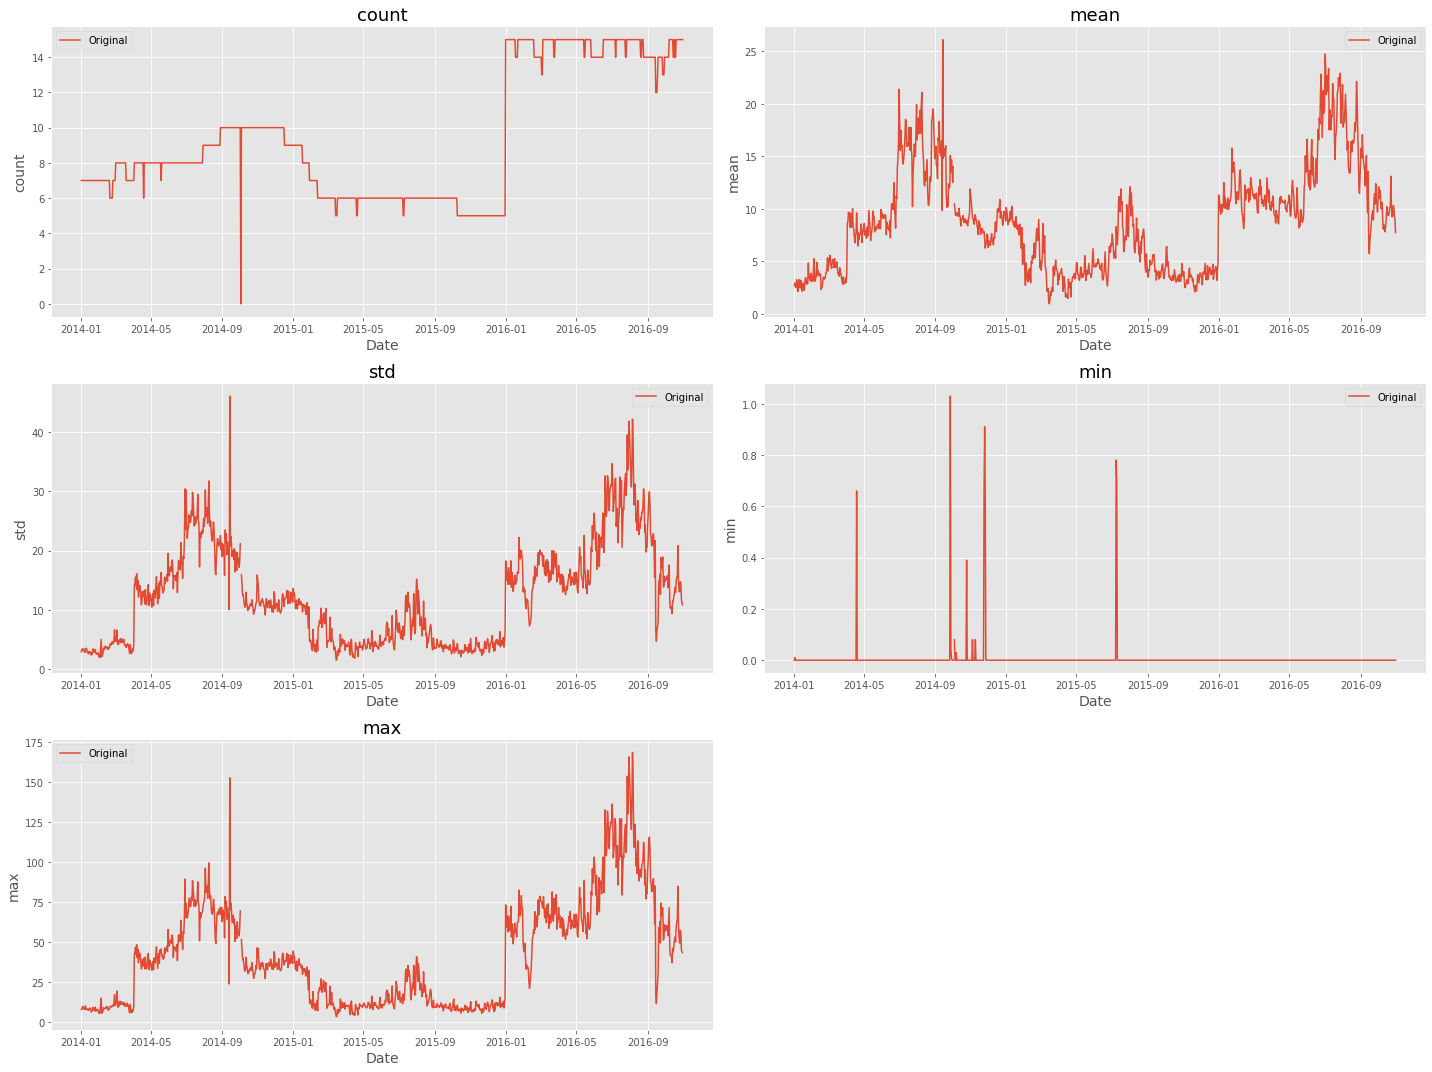

In [173]:
plot_description_dataframe(description_df, is_interactive=False)

In [3]:
def plot_consumer_kWhs(consumer_idx=[0], start_idx=2, end_idx=1036, 
                       original_data=sorted_df, processed_data=None, figsize=(18, 6),
                      plot_mean_std=False, is_interactive=False):
    # Dates will be used as DatetimeIndex for easy plotting
    dates = pd.DatetimeIndex(original_data.columns[start_idx : end_idx])
    
    # If interactive, set matplotlib magic command 
    if is_interactive:
        %matplotlib notebook
    else:
        %matplotlib inline
    
    # For every consumer index specified
    for i in consumer_idx:
        # Create a new figure
        plt.figure(figsize=figsize)
        
        # Do not plot if not one-to-one correspondence between dates and kWhs
        assert len(dates) == len(original_data.iloc[i, start_idx : end_idx])
        
        # Plot the kWhs for the original data
        plt.plot(dates, original_data.iloc[i, start_idx : end_idx], label='Original', 
                zorder=10)
        
        # If also comparing against the processed data
        if processed_data is not None:
            plt.plot(dates, processed_data.iloc[i, start_idx:end_idx], label='Processed',
                    zorder=0)
        
        # Also shade area between mean and and standard deviation 
        
        # Annotate
        plt.xlabel('Date', fontsize=14)
        plt.ylabel('kWh', fontsize=14)
        consumer_ID = original_data.iloc[i, 0][-4:-1]
        title_str = "kWh Against Time - Consumer {} \n ID Ending {}".format(i, consumer_ID)
        plt.title(title_str, fontsize=18)
        plt.grid(True)
        plt.legend()

NameError: name 'sorted_df' is not defined

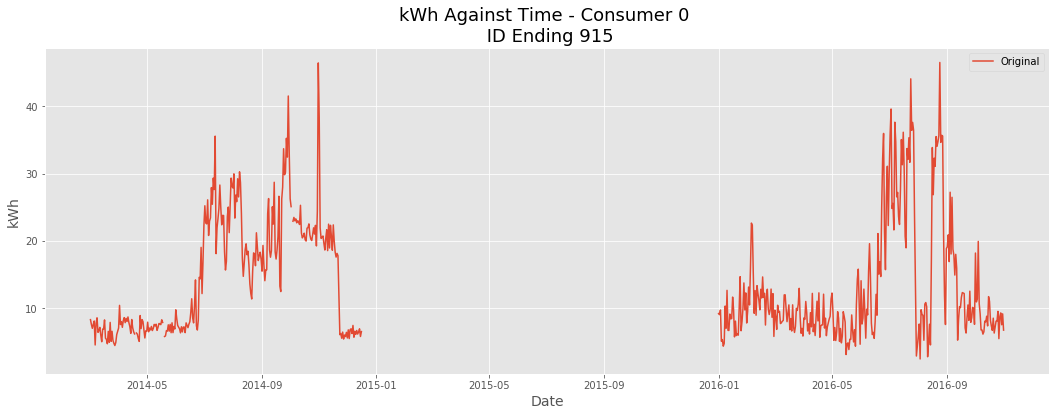

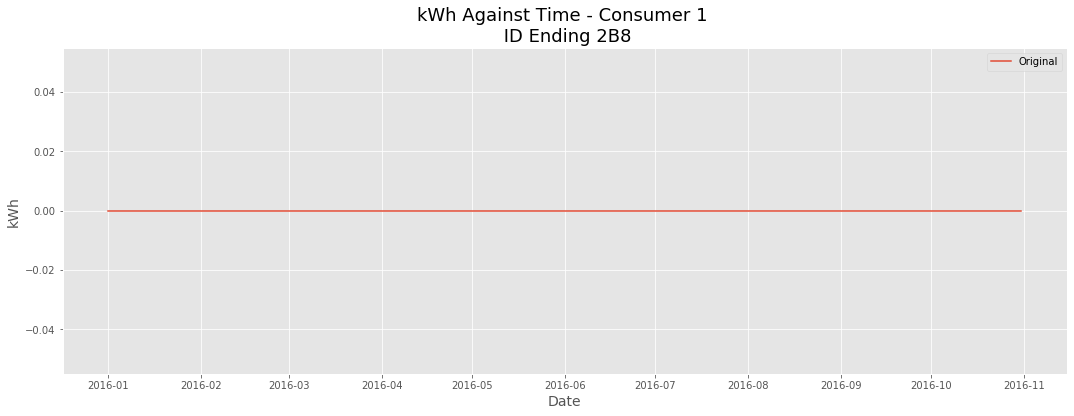

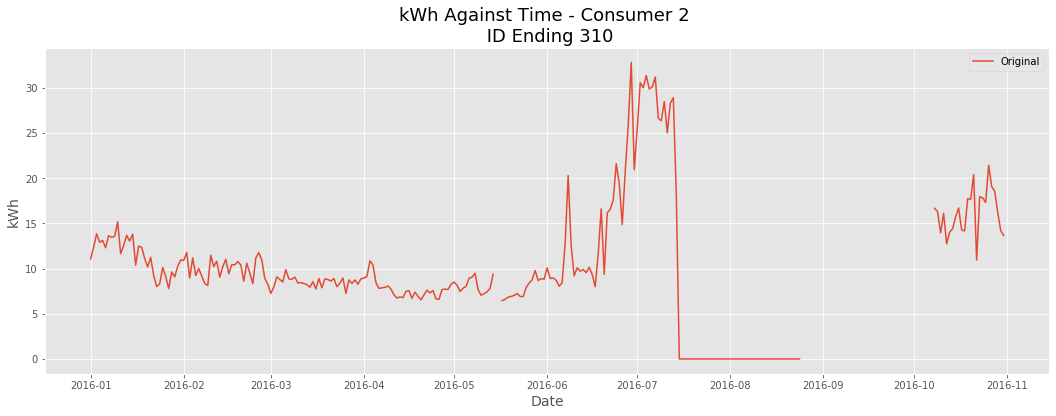

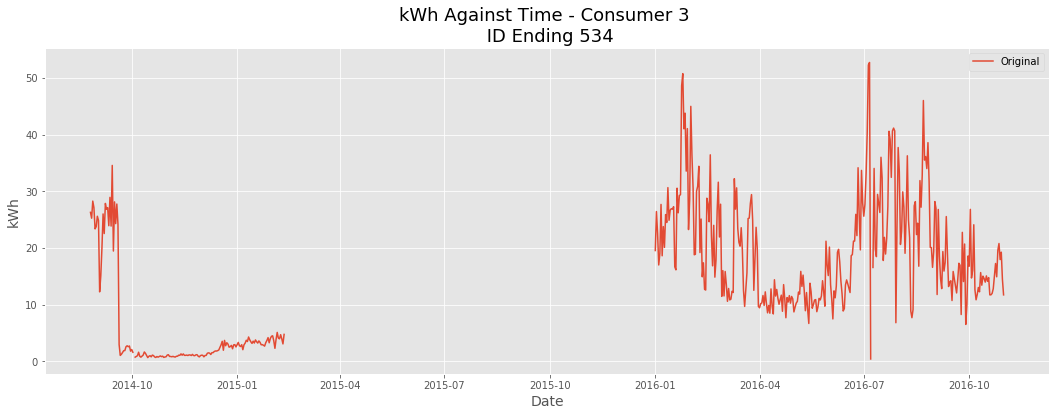

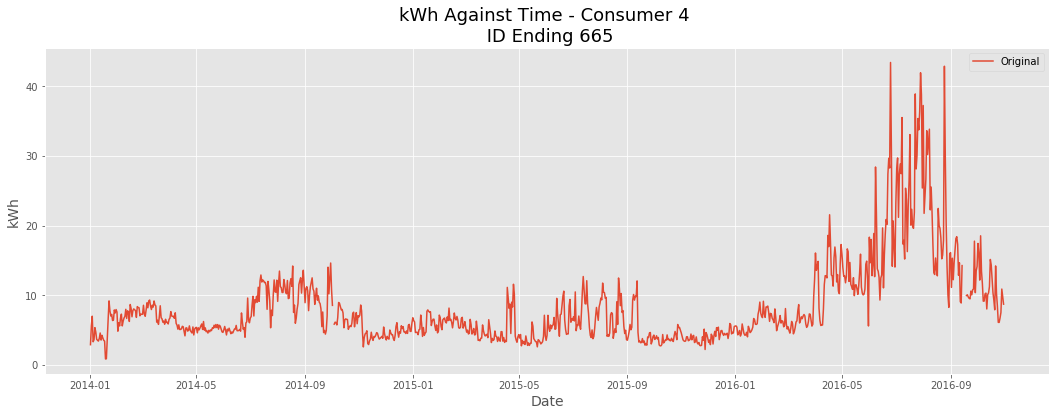

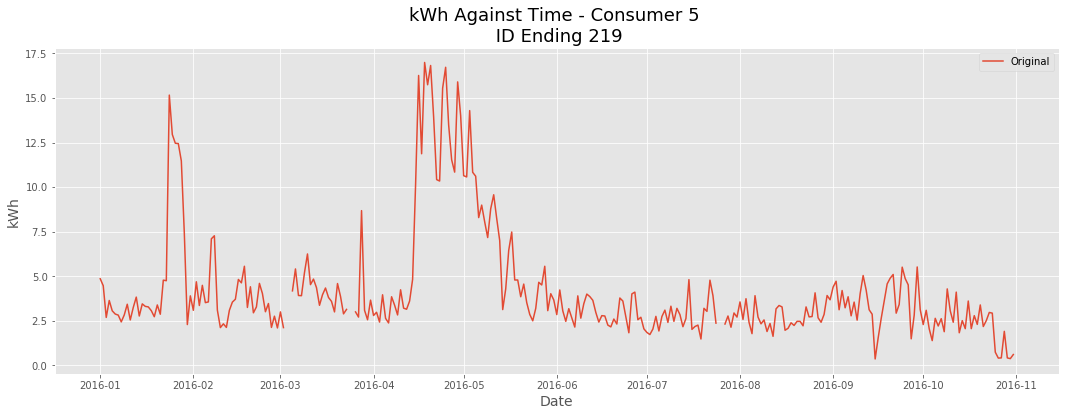

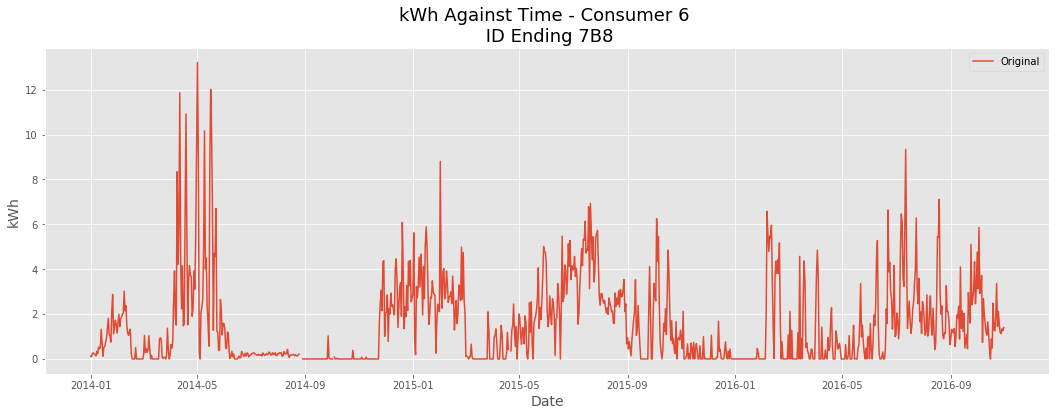

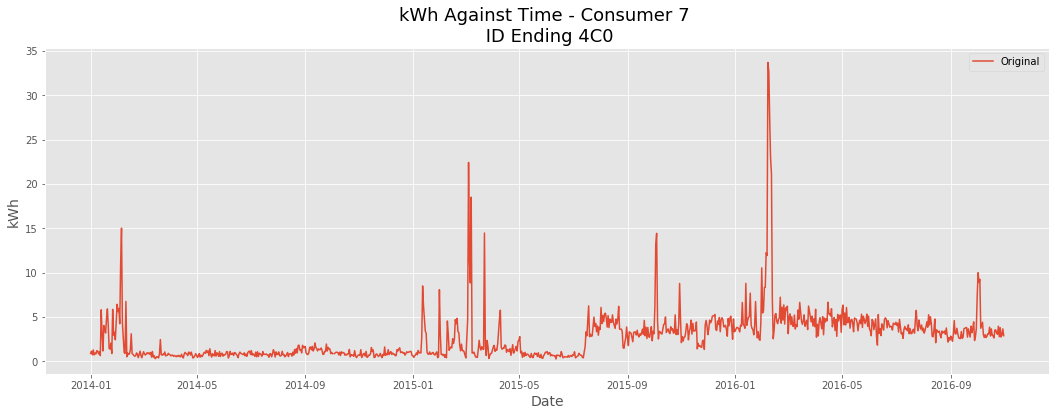

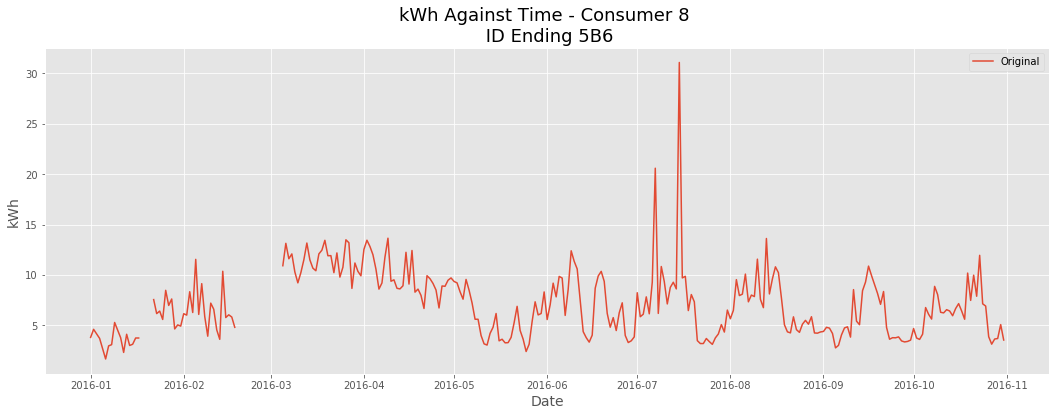

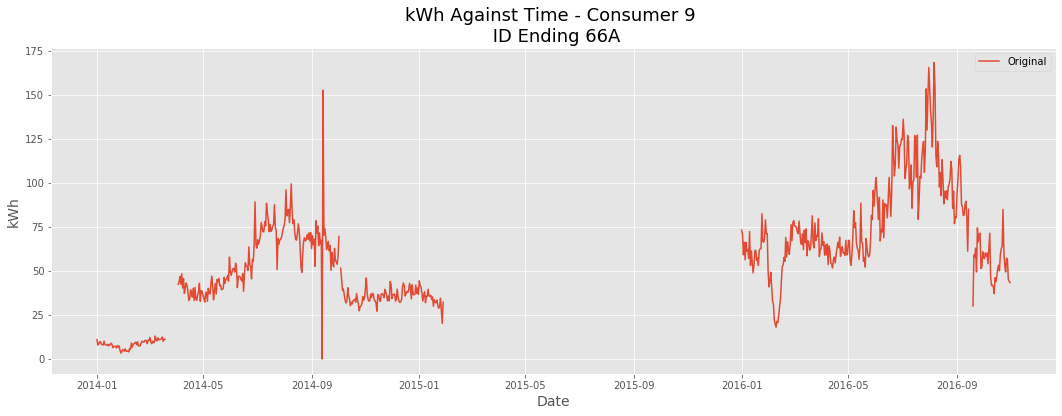

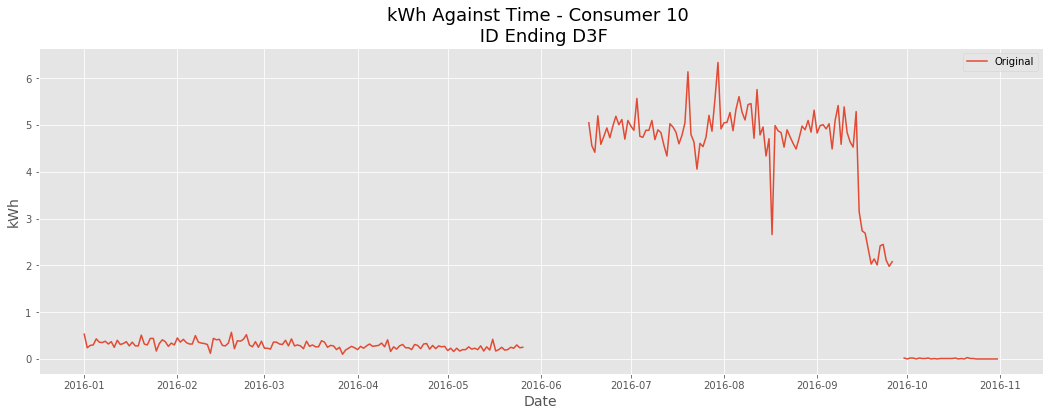

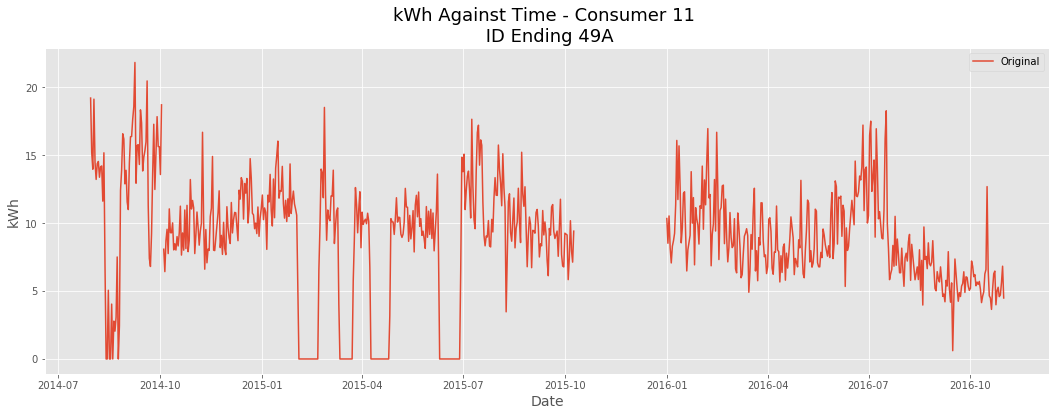

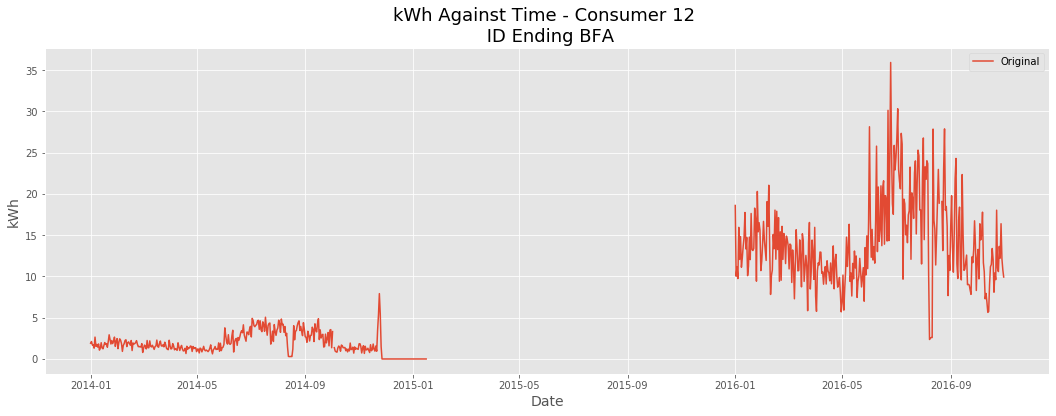

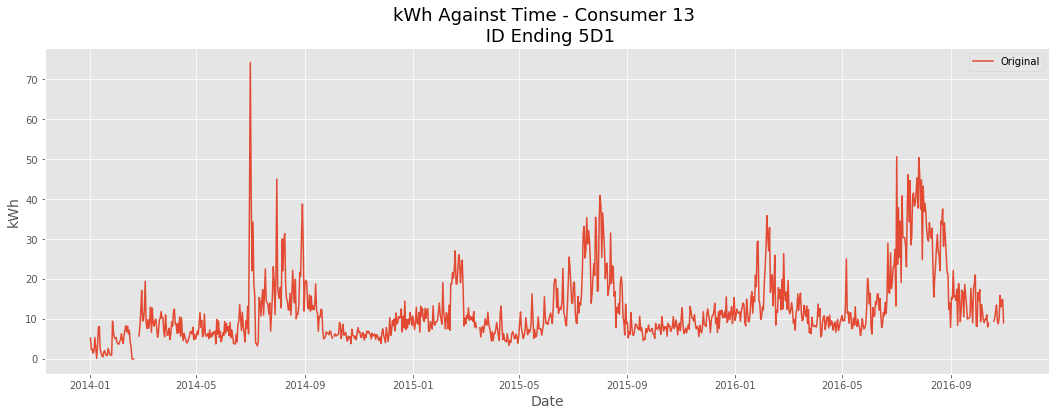

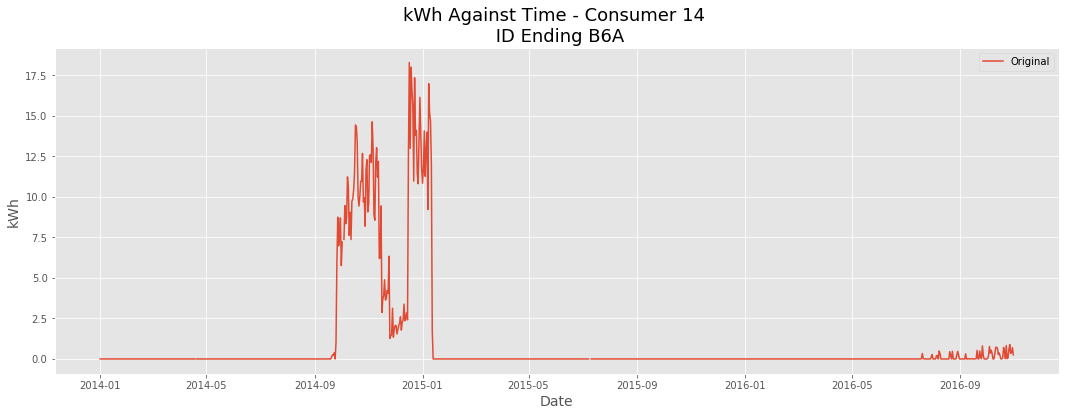

In [45]:
plot_consumer_kWhs(consumer_idx=np.arange(0, 15, 1), is_interactive=False)

### Visualizing Distribution of Missing Values

In [84]:
value_counts = sorted_df.describe().loc['count'].drop('FLAG')

In [86]:
value_counts_df = pd.DataFrame(value_counts)

In [89]:
max_threshold = NUM_CONSUMERS * np.ones((NUM_DAYS, 1))

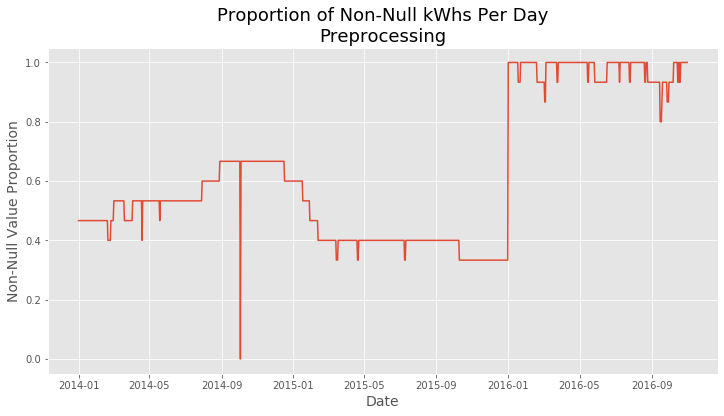

In [95]:
plt.figure(figsize=(12, 6))
plt.plot(pd.DatetimeIndex(value_counts_df.index),
        value_counts_df.values / NUM_CONSUMERS, label='Non-Null Values')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Non-Null Value Proportion', fontsize=14)
plt.title('Proportion of Non-Null kWhs Per Day\nPreprocessing', fontsize=18)
plt.grid(True)

### Proportions of Missing Values by Consumer

In [96]:
sorted_df.head()

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72


In [100]:
sorted_kWhs_by_date = sorted_df.transpose().iloc[2:, :]
sorted_kWhs_by_date.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
2014-01-01,NaN,NaN,NaN,NaN,2.9,NaN,0.11,0.91,NaN,11.02,NaN,NaN,1.91,5.2,0
2014-01-02,NaN,NaN,NaN,NaN,5.64,NaN,0.11,1.16,NaN,7.92,NaN,NaN,2.11,2.35,0
2014-01-03,NaN,NaN,NaN,NaN,6.99,NaN,0.25,0.75,NaN,8.41,NaN,NaN,1.69,2.56,0.01
2014-01-04,NaN,NaN,NaN,NaN,3.32,NaN,0.27,1.3,NaN,9.66,NaN,NaN,1.72,1.46,0
2014-01-05,NaN,NaN,NaN,NaN,3.61,NaN,0.21,0.74,NaN,9.86,NaN,NaN,1.31,2.04,0


In [104]:
value_counts = sorted_kWhs_by_date.describe().loc['count']

In [106]:
value_counts_df = pd.DataFrame(value_counts)
value_counts_df.head()

,count
0,591.0
1,304.0
2,259.0
3,472.0
4,1030.0


Text(0.5, 1.0, 'Proportion of Non-Null Values By Consumer\nPreprocessing')

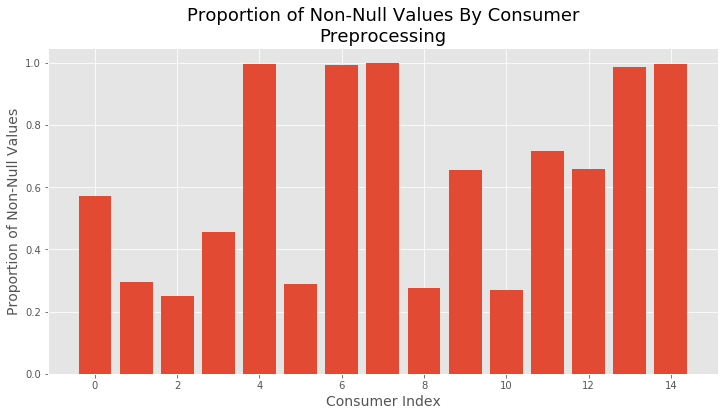

In [109]:
plt.figure(figsize=(12, 6))
plt.bar(x=value_counts_df.index, height=value_counts_df['count'] / NUM_DAYS)
plt.xlabel('Consumer Index', fontsize=14)
plt.ylabel('Proportion of Non-Null Values', fontsize=14)
plt.title('Proportion of Non-Null Values By Consumer\nPreprocessing', fontsize=18)

/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


Text(0.5, 1.0, 'Distribution of Non-Null Values by Consumer\nPreprocessing')

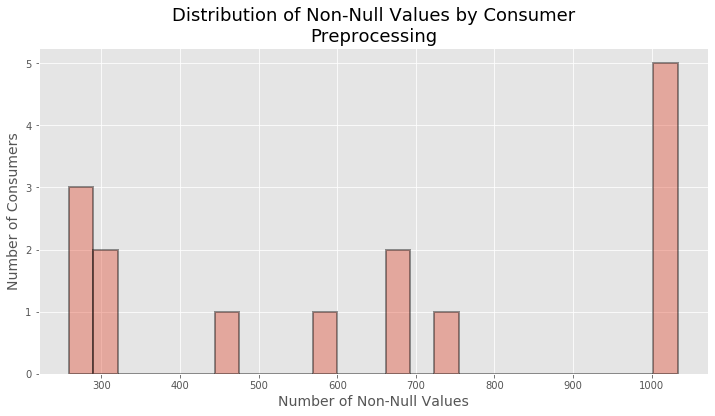

In [123]:
plt.figure(figsize=(12, 6))
distplot(value_counts_df, kde=False, hist_kws=dict(edgecolor='k', linewidth=2), 
         bins=25)
plt.xlabel('Number of Non-Null Values', fontsize=14)
plt.ylabel('Number of Consumers', fontsize=14)
plt.title('Distribution of Non-Null Values by Consumer\nPreprocessing', fontsize=18)

### Adding Zheng's Processing Rule

In [54]:
# Making a deep copy so that I don't modify the original dataset
df_missing_replaced = sorted_df.copy(deep=True)

In [56]:
# For every consumer in the test dataset
for i in range(0, NUM_CONSUMERS):
    
    # And for every kWh value after the first day (which starts at index 3)
    for j in range(3, NUM_DAYS - 1):
        # Only modify the data if it is NaN
        if np.isnan(df_missing_replaced.iloc[i, j]):
            # Extract next and previous values
            next_val = df_missing_replaced.iloc[i, j + 1]
            prev_val = df_missing_replaced.iloc[i, j - 1]
            
            # Boolean conditions for replacement
            # Both adjacent values are not NaNs
            both_not_nan = ~np.isnan(prev_val) and ~np.isnan(next_val)
            
            # One of the two adjacent values is a NaN
            either_is_nan = np.isnan(prev_val) or np.isnan(next_val)
            
            # If both adjacent values are defined, replace missing with their mean
            if (both_not_nan):
                df_missing_replaced.iloc[i, j] = np.mean([next_val, prev_val])
                
            # If either adjacent value is NaN, replace missing with 0.0
            elif (either_is_nan):
                df_missing_replaced.iloc[i, j] = 0.0

In [57]:
df_missing_replaced.head()

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72


### Plotting Distributions Pre and Post Processing

In [60]:
# Unravel the original sorted data into a single long array
sorted_vals_unraveled = sorted_df.iloc[:, 2:].values.ravel()

In [62]:
# Remove all the NaNs from this array of kWh values
sorted_vals_filtered = sorted_vals_unraveled[~np.isnan(sorted_vals_unraveled)]

In [66]:
# Check that no NaNs exist in the original kWhs after filtering
np.any(np.isnan(sorted_vals_filtered))

False

In [124]:
# After processing, the only NaNs in the data are in first and last columns
# According to our rule, replacing them with 0.0
df_missing_replaced_no_na = df_missing_replaced.fillna(0, inplace=False)

/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


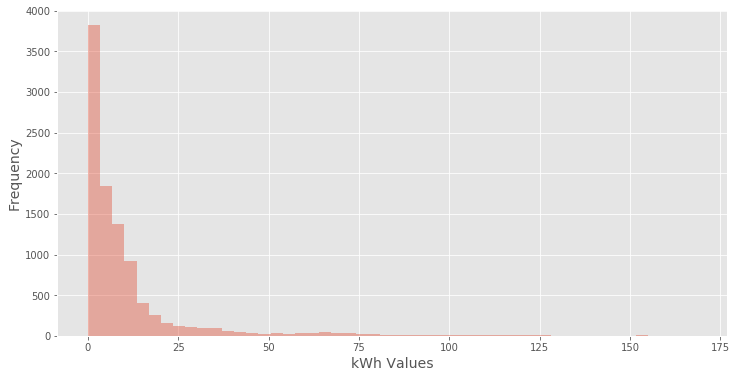

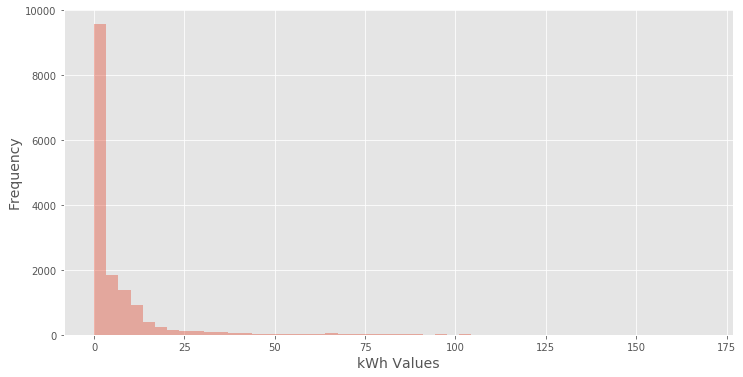

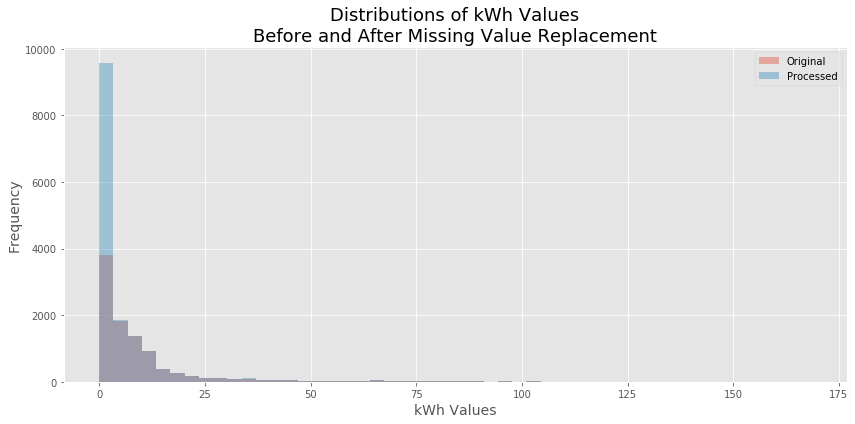

In [130]:
# Comparing distributions of original and processed values
# Original data separately
plt.figure(figsize=(12, 6))
distplot(sorted_vals_filtered, kde=False, label='Original')
plt.xlabel('kWh Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Processed data separately
plt.figure(figsize=(12, 6))
distplot(df_missing_replaced_no_na.iloc[:, 2:].values.ravel(), 
         kde=False, label='Processed')
plt.xlabel('kWh Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


# On the same graph
plt.figure(figsize=(12, 6))
distplot(sorted_vals_filtered, kde=False, label='Original')
distplot(df_missing_replaced_no_na.iloc[:, 2:].values.ravel(), 
         kde=False, label='Processed')
plt.xlabel('kWh Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distributions of kWh Values\nBefore and After Missing Value Replacement', fontsize=18)
plt.legend()
plt.tight_layout()

### Comparing Description Params

In [151]:
df_missing_replaced_no_na.describe()

,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
count,15.0,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.0,1.470000,1.286000,1.377333,1.182000,1.184667,1.522667,1.212667,1.002000,1.321333,...,10.199333,13.106000,10.104667,9.251333,9.360667,10.315333,10.260000,9.372000,9.024667,7.758000
std,0.0,3.035095,2.406262,2.688166,2.538757,2.614104,2.672047,2.364235,2.159359,2.724948,...,15.693252,20.828133,15.172990,13.158855,13.049923,14.750898,14.464423,11.849619,11.139492,10.844624
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.180000,3.095000,2.190000,1.430000,1.065000,1.035000,1.520000,0.880000,0.980000,1.005000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.180000,8.070000,7.140000,6.110000,5.280000,4.590000,4.710000,5.620000,6.830000,4.490000
75%,1.0,1.410000,1.635000,1.220000,1.380000,1.025000,1.795000,1.190000,0.775000,1.305000,...,11.485000,14.310000,10.235000,10.060000,11.940000,14.055000,14.695000,13.470000,12.510000,9.480000
max,1.0,11.020000,7.920000,8.410000,9.660000,9.860000,8.320000,8.210000,7.880000,10.170000,...,64.110000,84.890000,60.860000,52.670000,49.430000,57.220000,56.680000,45.280000,44.040000,43.360000


In [154]:
df_interpolated = df_missing_replaced_no_na.copy()

In [158]:
df_interpolated.columns

Index([ 'CONS_NO',     'FLAG', 2014-01-01, 2014-01-02, 2014-01-03, 2014-01-04,
       2014-01-05, 2014-01-06, 2014-01-07, 2014-01-08,
       ...
       2016-10-22, 2016-10-23, 2016-10-24, 2016-10-25, 2016-10-26, 2016-10-27,
       2016-10-28, 2016-10-29, 2016-10-30, 2016-10-31],
      dtype='object', length=1036)

In [159]:
df_interpolated.describe()

,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
count,15.0,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.0,1.470000,1.286000,1.377333,1.182000,1.184667,1.522667,1.212667,1.002000,1.321333,...,10.199333,13.106000,10.104667,9.251333,9.360667,10.315333,10.260000,9.372000,9.024667,7.758000
std,0.0,3.035095,2.406262,2.688166,2.538757,2.614104,2.672047,2.364235,2.159359,2.724948,...,15.693252,20.828133,15.172990,13.158855,13.049923,14.750898,14.464423,11.849619,11.139492,10.844624
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.180000,3.095000,2.190000,1.430000,1.065000,1.035000,1.520000,0.880000,0.980000,1.005000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.180000,8.070000,7.140000,6.110000,5.280000,4.590000,4.710000,5.620000,6.830000,4.490000
75%,1.0,1.410000,1.635000,1.220000,1.380000,1.025000,1.795000,1.190000,0.775000,1.305000,...,11.485000,14.310000,10.235000,10.060000,11.940000,14.055000,14.695000,13.470000,12.510000,9.480000
max,1.0,11.020000,7.920000,8.410000,9.660000,9.860000,8.320000,8.210000,7.880000,10.170000,...,64.110000,84.890000,60.860000,52.670000,49.430000,57.220000,56.680000,45.280000,44.040000,43.360000


In [257]:
df_missing_replaced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Columns: 1036 entries, CONS_NO to 2016-10-31
dtypes: float64(1034), int64(1), object(1)
memory usage: 122.1+ KB


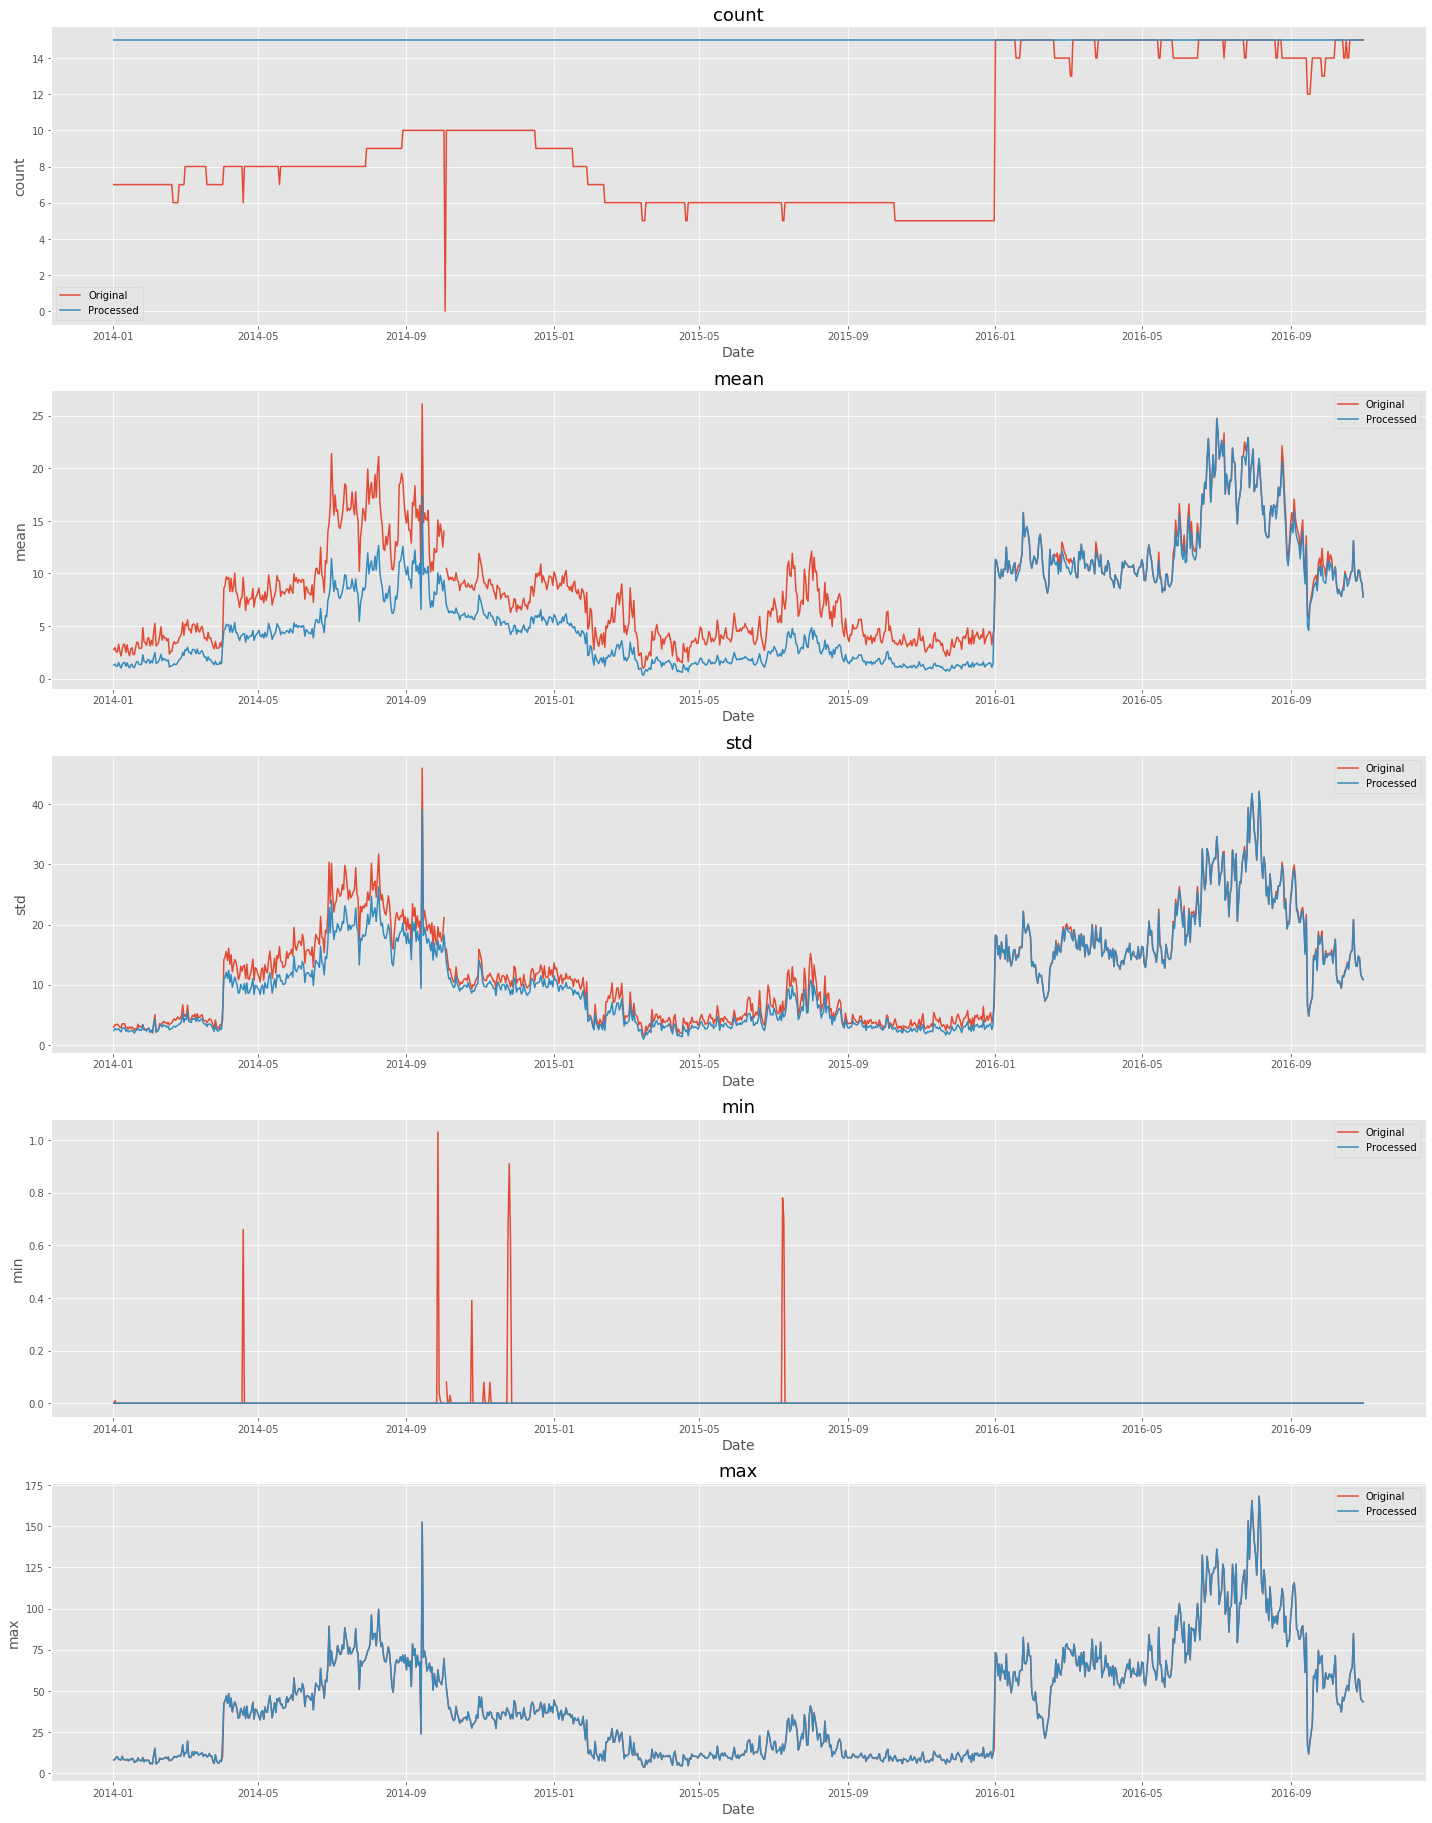

In [174]:
plot_description_dataframe(original_data=sorted_df.describe(), 
                          processed_data=df_missing_replaced_no_na.describe(),
                          subplot_rows=6, subplot_cols=1, 
                          figsize=(20, 30))

### Interpretation
- **Count** should consistently be the number of consumers in the dataset being processed (in this case 15).
- **Mean** value decreases after processing
    - before the processing, mean was the average of fewer non-null values, many of which were not 0. 
    - Distribution plot shows that after processing, the number of values near 0 increases from ~4000 to ~10000.
    - Not only does the replacement of a subset of NaNs with 0s and means increase the number of values over which the mean is averaged, but also drives down this average.
    - This is because the sum of values remains more or less the same when the majority of new values being added are 0. 
    - Assuming the sum of values to be nearly constant, as the number over which these values are averaged increases, the average or mean value also decreases.
- **Standard Deviation**: decreases after processing
    - The standard deviation is given by 
    $$\sigma = \sqrt{\frac{\Sigma{x_i - \mu}}{N}}$$
    - We have established that $\mu$ decreases postprocessing. As $\sigma$ is proportional to $\mu$, this means the effect of decreasing mean is decreasing standard deviation
    - Furthermore, $\sigma$ is inversely proportional to $N$, which increases with missing value replacement. 
- **Minimum Value** should always be 0 now that all `NaN`s have been replaced with 0s. Before replacement, the minimum value was the smallest non-null value, which need not have been zero.
- **Maximum Value** almost perfectly tracks the original data, as the addition of a 0s or mean values in place of `NaN`s can never replace an existing maximum value.

### Visualizing kWhs of Consumers Post Processing

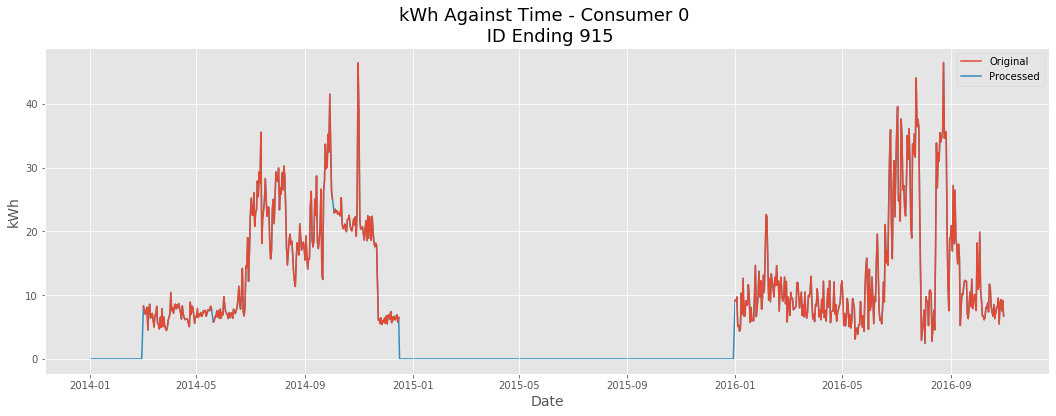

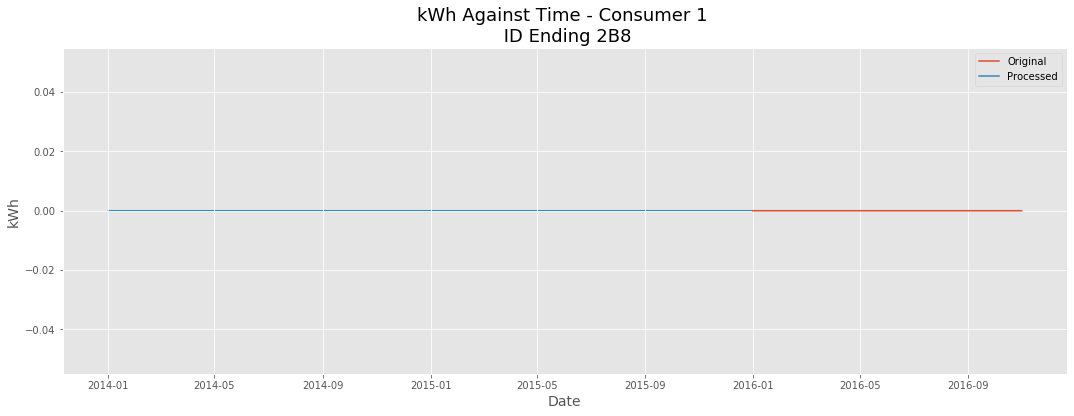

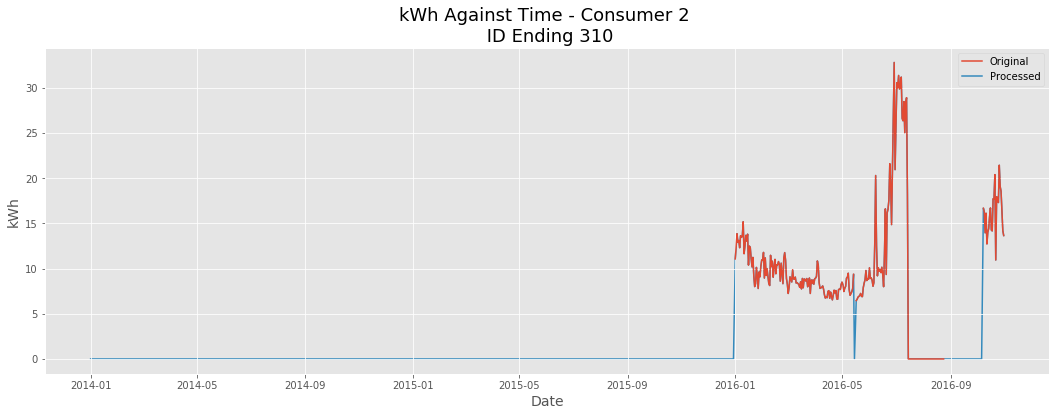

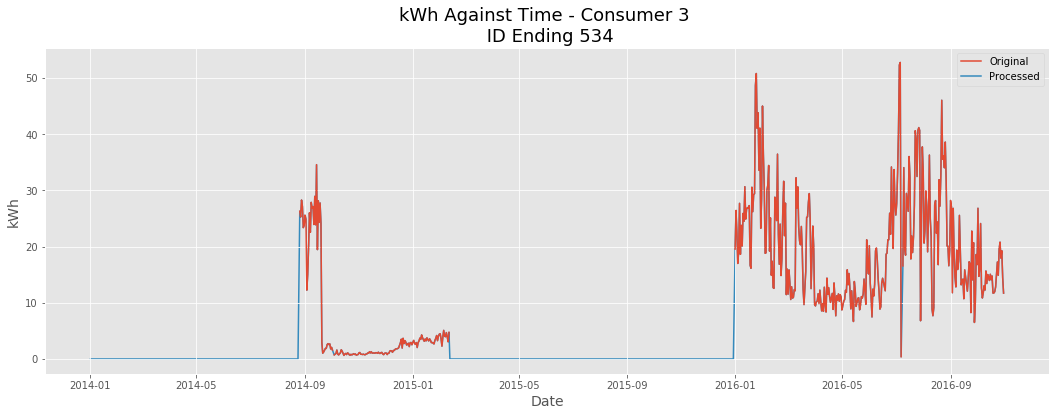

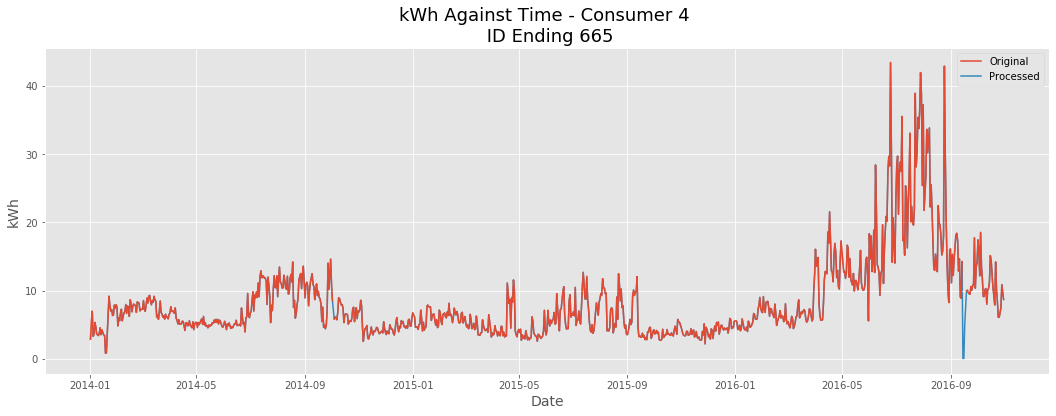

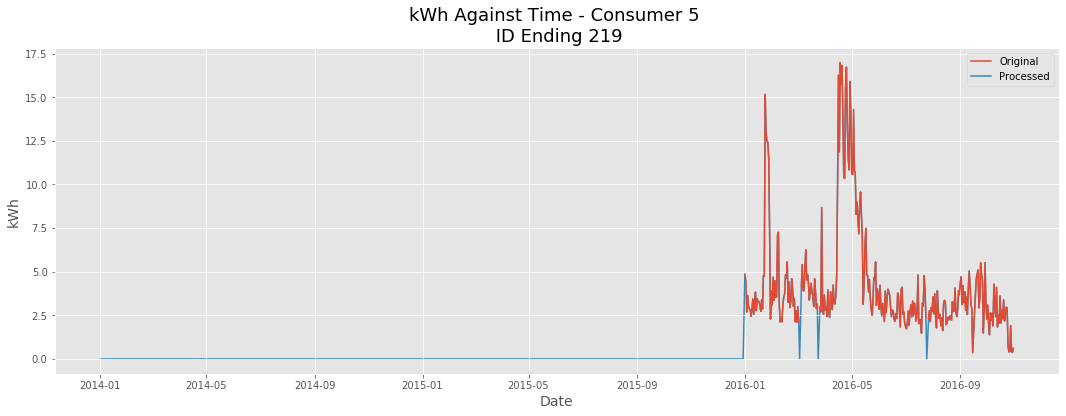

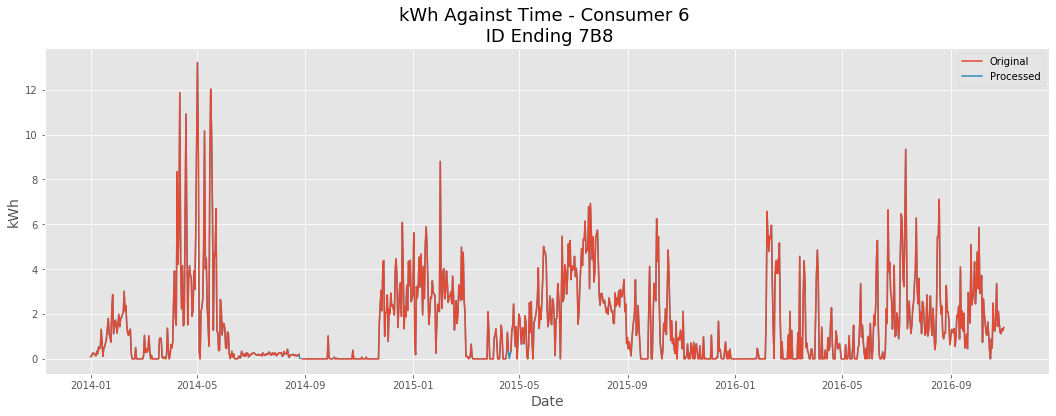

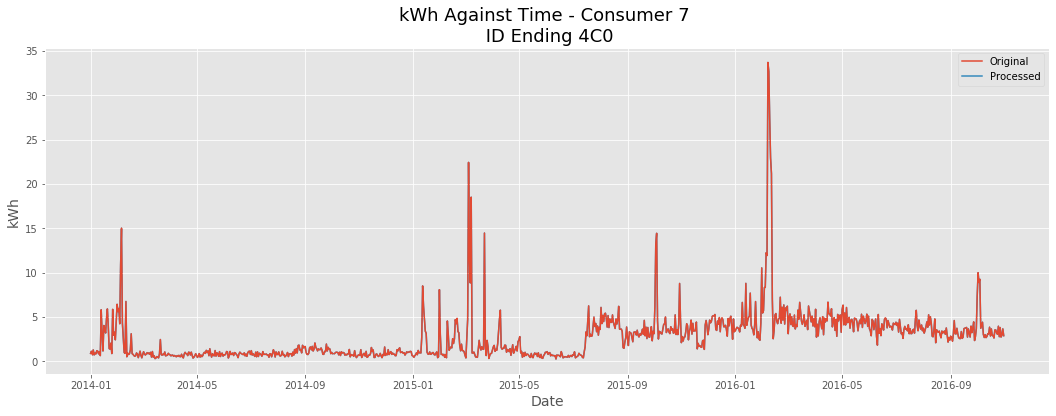

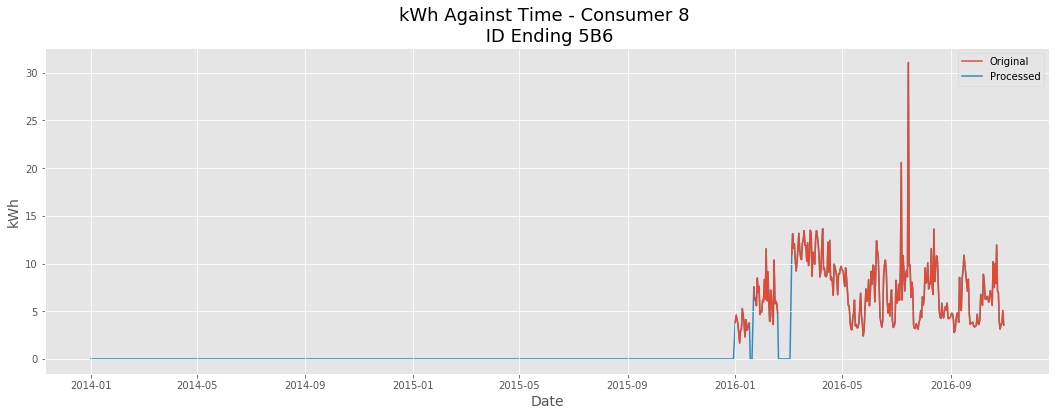

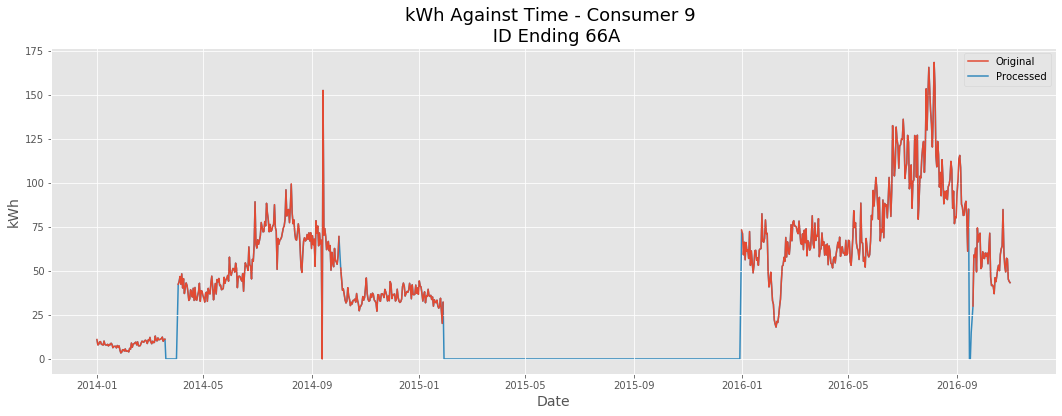

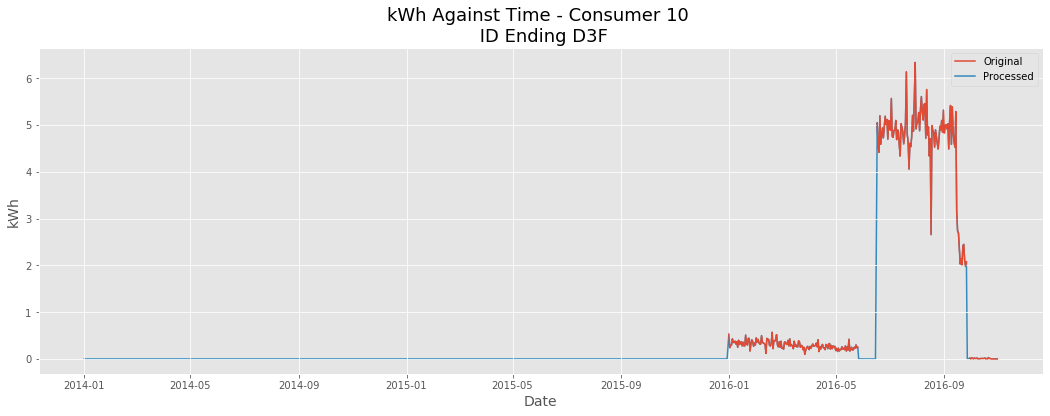

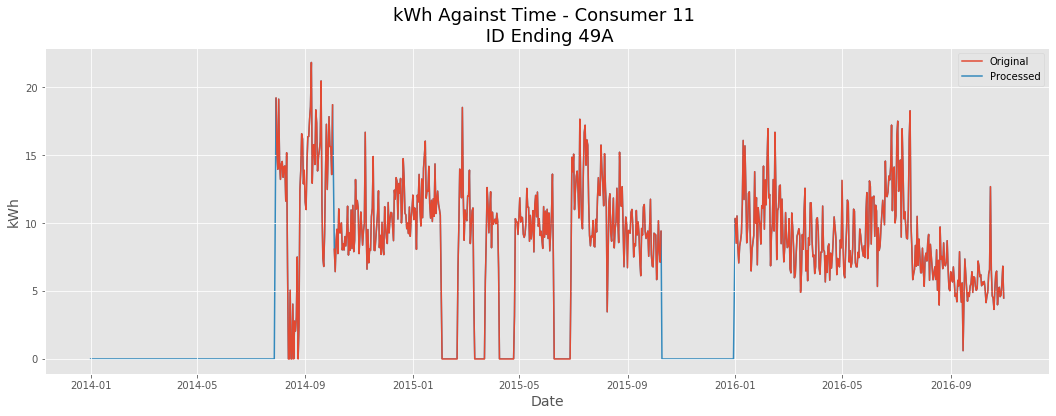

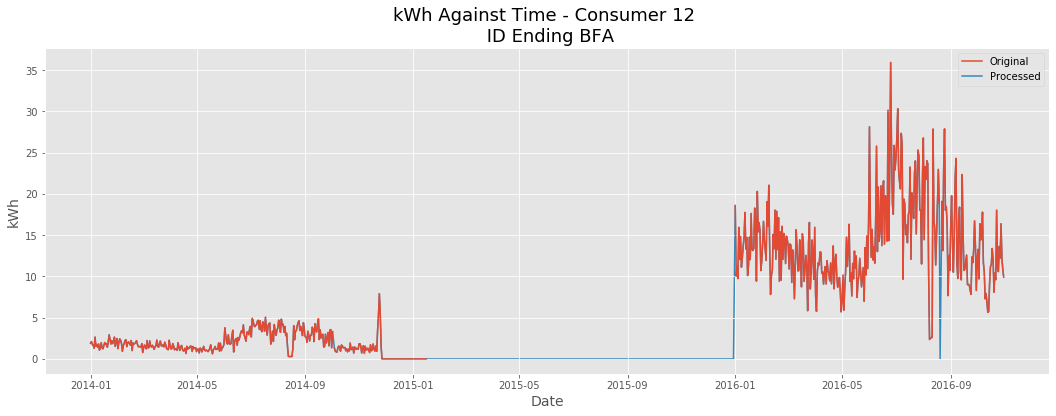

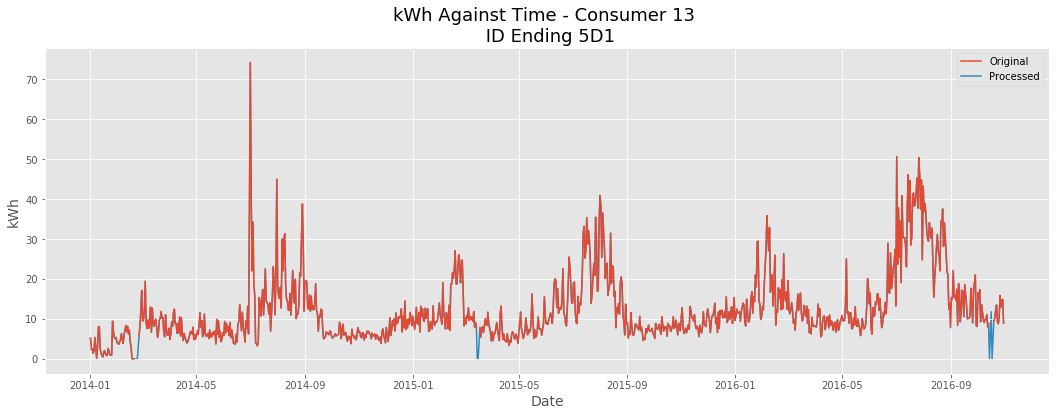

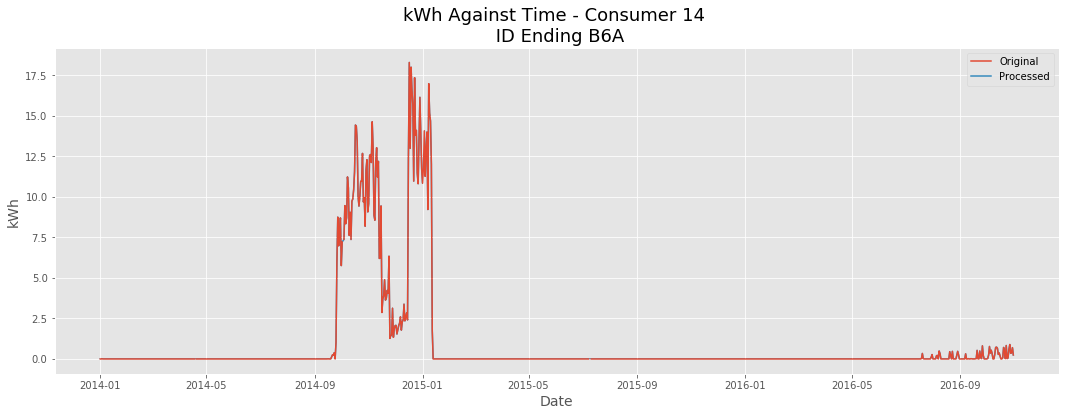

In [183]:
plot_consumer_kWhs(consumer_idx=np.arange(0, NUM_CONSUMERS), processed_data=df_interpolated)

### Interpretation
- These graphs look nice.
- Missing values have indeed been replaced correctly as the processed line is 'filling in the gaps' that existed in the original kWh data. 

In [5]:
df_interpolated.to_csv('./data-interpolated.csv', index=False)

NameError: name 'df_interpolated' is not defined

## Outliers

Zheng says outliers have to be identified based on the application of the three-sigma rule on a daily basis. 

Supervisor says it makes more sense to apply the rule based on the mean and standard deviation of an individual consumer, rather than all consumers.

Will attempt both.

In [72]:
df = pd.read_csv('./Test-Data/data-interpolated.csv')

In [73]:
df.head()

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,B32AC8CC6D5D805AC053557AB05F5343,1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72


In [74]:
# Extracting the kWhs only 
kWhs = df.iloc[:, 2:]

# Confirm extraction successful
kWhs.head()

,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72


In [75]:
# What will the use of axis=0 and axis=1 yield in mean/std?
kWhs.mean(axis=1)

0      7.988158
1      0.000000
2      2.501688
3      6.701586
4      8.229603
5      1.229874
6      1.522340
7      2.721132
8      1.980604
9     37.214647
10     0.498201
11     6.384574
12     4.822984
13    12.244734
14     0.951185
dtype: float64

`axis=1` calculates the mean kWh consumption on a consumer basis. `std` will be computed on a similar basis.

In [76]:
kWhs.mean(axis=0)

2014-01-01     1.470000
2014-01-02     1.286000
2014-01-03     1.377333
2014-01-04     1.182000
2014-01-05     1.184667
2014-01-06     1.522667
2014-01-07     1.212667
2014-01-08     1.002000
2014-01-09     1.321333
2014-01-10     1.526667
2014-01-11     1.498667
2014-01-12     1.164667
2014-01-13     1.499333
2014-01-14     1.178000
2014-01-15     1.011333
2014-01-16     1.298000
2014-01-17     1.376667
2014-01-18     1.074667
2014-01-19     1.052667
2014-01-20     1.366000
2014-01-21     1.615333
2014-01-22     1.584667
2014-01-23     1.327333
2014-01-24     1.348000
2014-01-25     1.350000
2014-01-26     2.259333
2014-01-27     1.636667
2014-01-28     1.603333
2014-01-29     1.476000
2014-01-30     1.791333
                ...    
2016-10-02    11.291333
2016-10-03    10.274667
2016-10-04    10.990667
2016-10-05    10.669333
2016-10-06     9.339333
2016-10-07     9.953333
2016-10-08    10.622667
2016-10-09     8.909333
2016-10-10     8.080667
2016-10-11     8.488667
2016-10-12     8

`axis=0` computes the mean  or standard deviation on a daily basis (which is what Zheng has used to identify outliers).

### Zheng's Outlier Rule 

1. Compute the mean $\mu$ and standard deviation $\sigma$ of kWhs of **all consumers on a single day**.
2. Identify threshold for outliers using two sigma rule $$ \epsilon = \mu + 2 \times \sigma$$
3. Any values that exceed the threshold on that day are considered outliers. 
4. Replace these values with the threshold value $\epsilon$.

In [77]:
# Make a separate copy of the kWhs dataframe to modify using Zheng's rule
kWhs_zheng = kWhs.copy()

In [78]:
# Extract the number of consumers and number of days in this dataframe
NUM_CONSUMERS, NUM_DAYS = kWhs.shape
print(f"Number of consumers: {NUM_CONSUMERS}\nNumber of days: {NUM_DAYS}")

Number of consumers: 15
Number of days: 1034


In [79]:
first_col = kWhs_zheng.iloc[:, 0]

In [80]:
mean = first_col.mean()
std = first_col.std()
threshold = mean + 2 * std

In [81]:
threshold

7.540189453386113

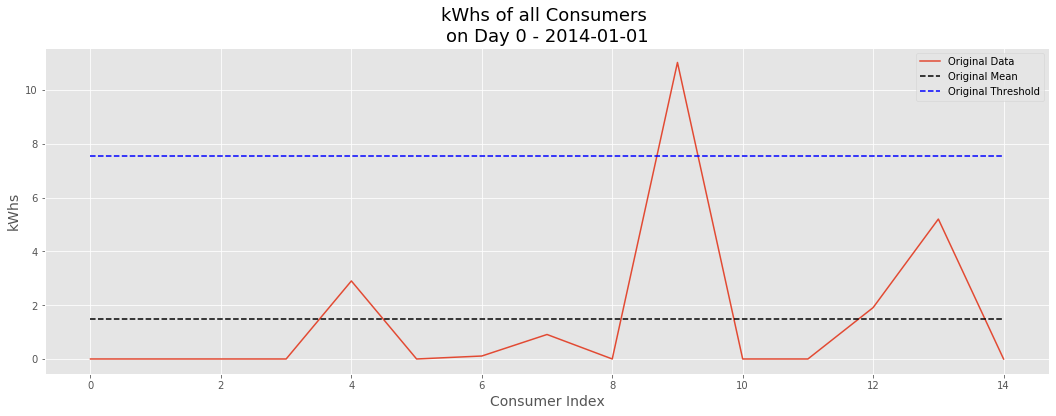

In [84]:
plot_daily_kWhs(plot_mean_std=True)

In [85]:
kWhs_zheng.iloc[:, 0].describe()

count    15.000000
mean      1.470000
std       3.035095
min       0.000000
25%       0.000000
50%       0.000000
75%       1.410000
max      11.020000
Name: 2014-01-01, dtype: float64

In [86]:
print(f"Mean: {mean}\nStandard Deviation: {std}\nThreshold: {threshold}")

Mean: 1.4699999999999998
Standard Deviation: 3.035094726693057
Threshold: 7.540189453386113


Creating a new function to plot the kWhs on a single day before and after processing

In [96]:
def plot_daily_kWhs(day_idx=[0], original_data=kWhs,
                   processed_data=None, figsize=(18, 6), 
                   plot_mean_std=False):
    # For every day in the specified list of indices
    for i in day_idx:
        # Create a new figure
        plt.figure(figsize=figsize)
        
        # Extract the Series for this day
        kWhs_day = original_data.iloc[:, i]
        num_days = len(kWhs_day)
        
        # Compute the mean and standard deviation 
        mean_original = kWhs_day.mean()
        std_original = kWhs_day.std()
        threshold_original = mean + 2 * std_original
        
        # Plot the original kWh data
        plt.plot(kWhs_day, label='Original Data')
    
        # If also plotting the processed data
        if processed_data is not None:
            plt.plot(processed_data.iloc[:, i], label='Processed Data')

        # If also have to plot the mean and standard deviation thresholds
        if plot_mean_std:
            # Plot the original data's mean and threshold
            plt.plot(mean_original * np.ones((num_days, 1)), 'r:', label='Original Mean')
            plt.plot(threshold_original * np.ones((num_days, 1)), 'r--', label='Original Threshold')
            
            # If also have to plot for processed data
            if processed_data is not None:
                # Mean and standard deviation of the processed data
                mean_processed = processed_data.iloc[:, i].mean()
        
                # Plot the processed data's mean - no need for threshold
                plt.plot(mean_processed * np.ones((num_days, 1)), 'b:', label='Processed Mean')
            
        # Annotate the axes
        plt.xlabel('Consumer Index', fontsize=14)
        plt.ylabel('kWhs', fontsize=14)
        
        # Extract date for the title 
        date = original_data.columns[i]
        title_str = 'kWhs of all Consumers \non Day {} - {}'.format(i, date)
        plt.title(title_str, fontsize=18)
        
        # Grid and legend
        plt.grid(True)
        plt.legend()

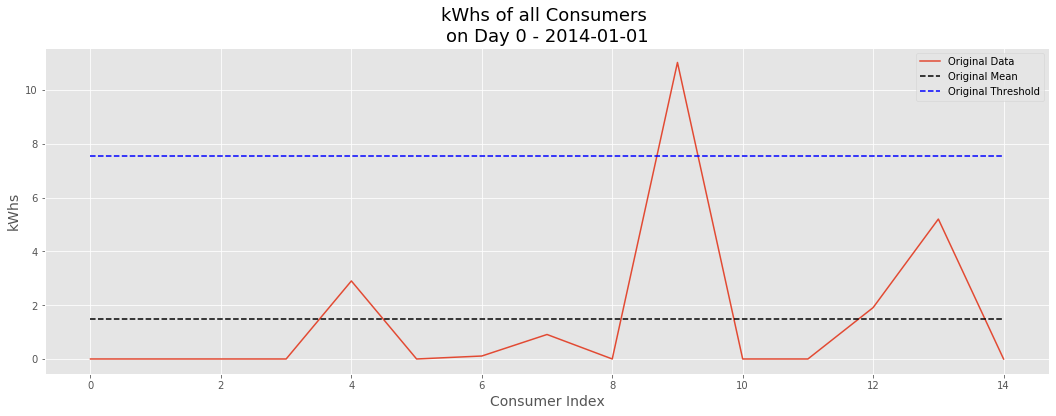

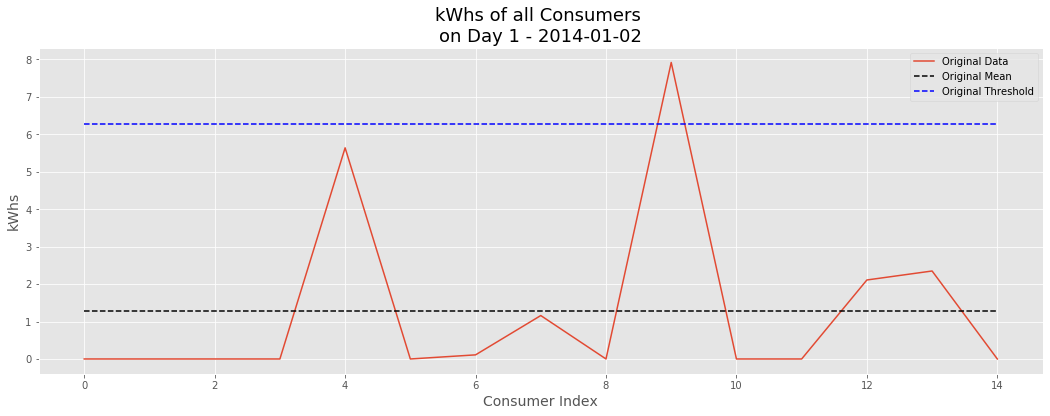

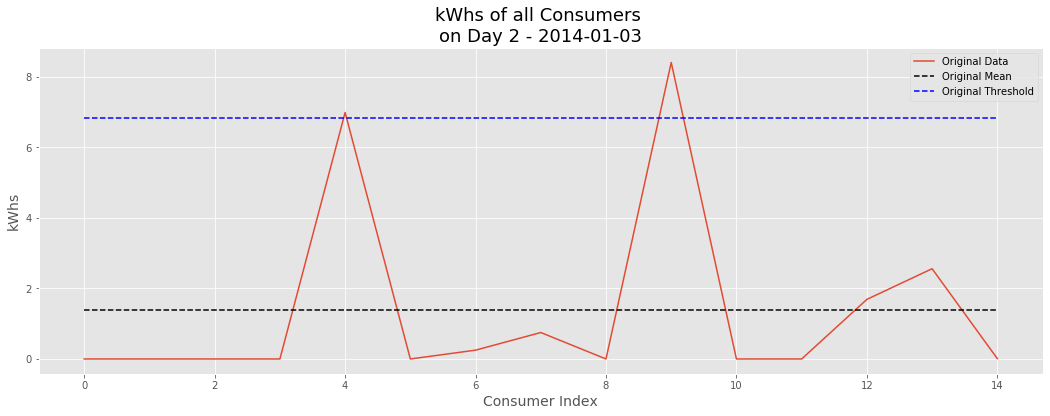

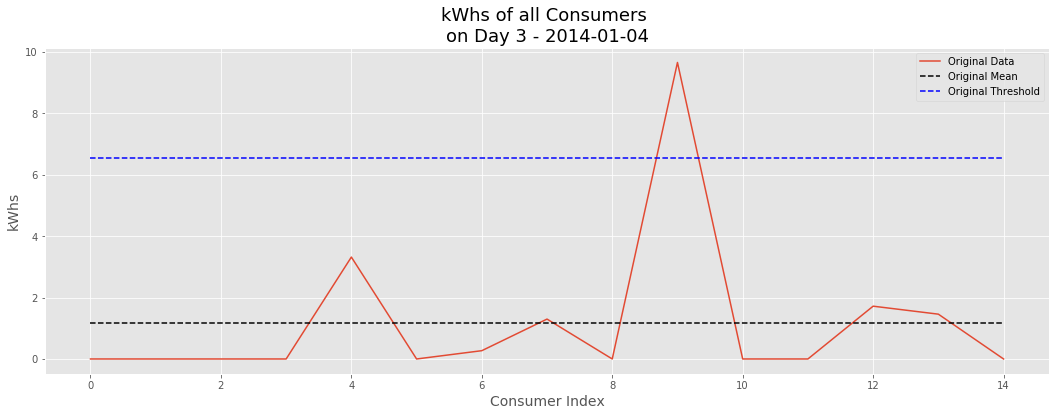

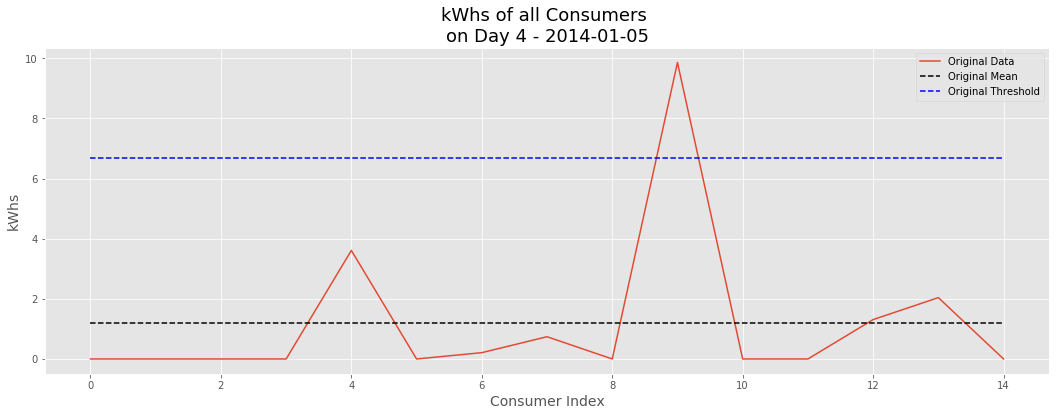

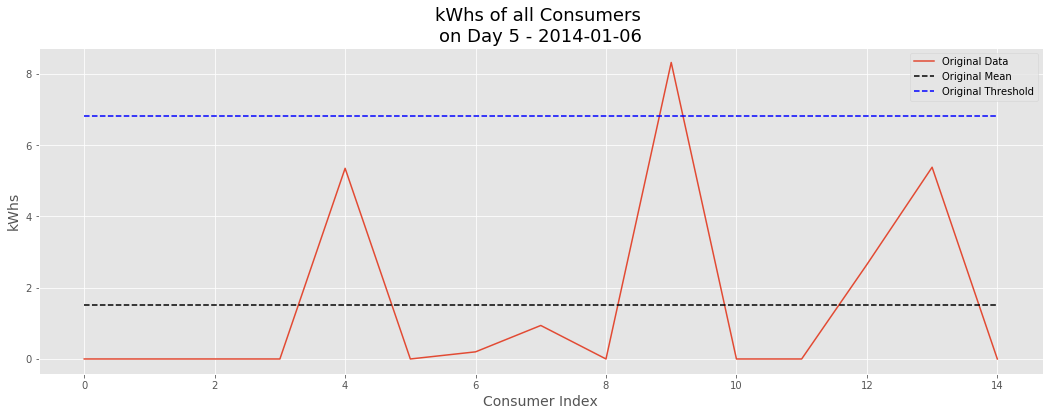

In [90]:
plot_daily_kWhs(day_idx=[0, 1, 2, 3, 4, 5], plot_mean_std=True)

In [94]:
# Replacing outliers on a daily basis
for i in range(0, NUM_DAYS):
    # Extracts the kWhs on that day
    kWhs_day = kWhs_zheng.iloc[:, i]
    
    # Compute mean, standard deviation, and threshold according to 2-sigma rule
    mean_day = kWhs_day.mean()
    std_day = kWhs_day.std()
    threshold = mean_day + 2 * std_day
    
    # Replace outliers with the threshold
    kWhs_day[kWhs_day > threshold] = threshold 
    
    # Replace the original kWhs series with the updated one
    kWhs_zheng.iloc[:, i] = kWhs_day

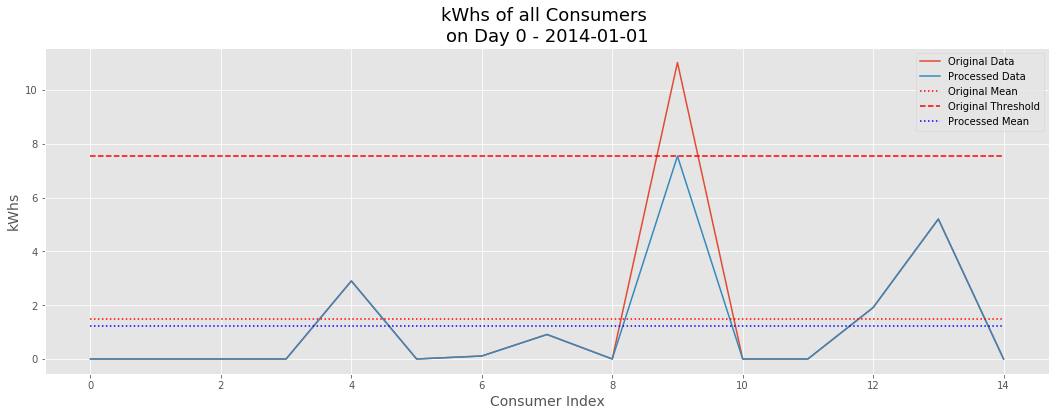

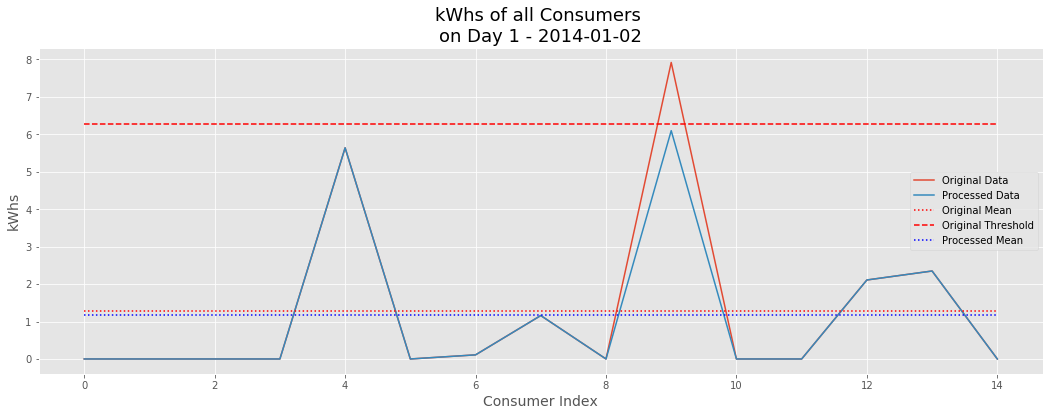

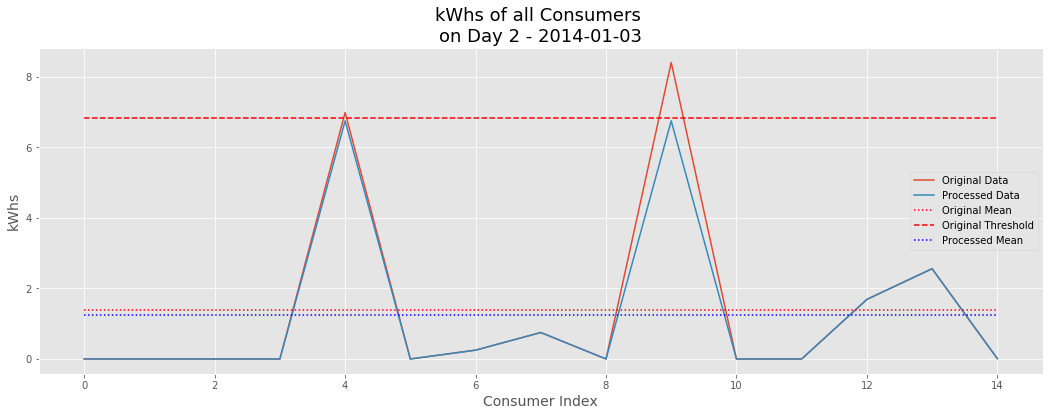

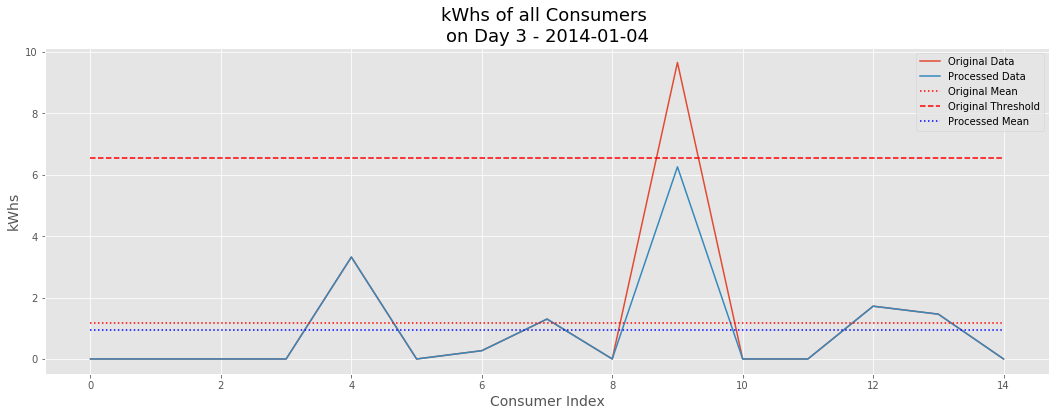

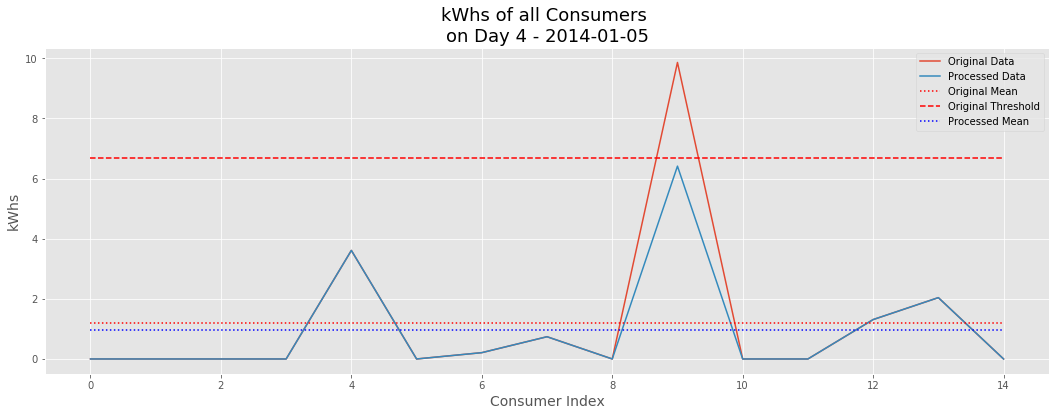

In [97]:
plot_daily_kWhs(day_idx=np.arange(0, 5), original_data=kWhs, processed_data=kWhs_zheng, 
               plot_mean_std=True)

### Interpretation
The implementation for the outlier replacement is correct because
- No kWh value of the processed data exceeds the 2-sigma threshold of the original data.
- Mean of the processed data is lower than that of the original data.
    - This is to be expected because outliers have been capped to the threshold value that is lower than the original maximum value. 
- The processed data is exactly the same as the original data except at instances above the threshold, which shows that non-outlier data has not been modified by the processing technique. 

### Writing Processed Data to CSV

In [98]:
kWhs_zheng.head()

,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0.0,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,0.0,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.0,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,0.0,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,2.9,5.64,6.753665,3.32,3.61,5.35,4.73,3.68,3.53,3.42,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72


In [102]:
df.head()

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,B32AC8CC6D5D805AC053557AB05F5343,1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72


In [103]:
# Add the CONS_NO and FLAG to this dataframe
kWhs_zheng.insert(0, 'CONS_NO', df[['CONS_NO']])
kWhs_zheng.head()

,CONS_NO,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,0.0,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,0.0,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,0.0,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,B32AC8CC6D5D805AC053557AB05F5343,0.0,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,EDFC78B07BA2908B3395C4EB2304665E,2.9,5.64,6.753665,3.32,3.61,5.35,4.73,3.68,3.53,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72


In [104]:
# Now add the flag
kWhs_zheng.insert(1, 'FLAG', df[['FLAG']])
kWhs_zheng.head()

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,0.0,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,0.0,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,0.0,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,B32AC8CC6D5D805AC053557AB05F5343,1,0.0,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,5.64,6.753665,3.32,3.61,5.35,4.73,3.68,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72


In [105]:
# Write to csv file for later
kWhs_zheng.to_csv('./Test-Data/data-final-zheng.csv')

### Veryifing Original Preprocessing Approach

Does the preprocessing approach in the original preprocessing notebook give the same results as this one?

In [106]:
NUM_CONSUMERS, NUM_DAYS = kWhs.shape

In [107]:
print(NUM_CONSUMERS)
print(NUM_DAYS)

15
1034


In [119]:
# Create an outlier Boolean Mask
outlierBooleanMask = np.zeros((NUM_DAYS, NUM_CONSUMERS))

In [110]:
# Get column-wise means and standard deviations
meansByDay = kWhs.mean(axis=0)
stdsByDay = kWhs.std(axis=0)

In [112]:
# Two-sigma threshold for each coumn 
thresholds = meansByDay + 2 * stdsByDay

In [116]:
# Make a separate copy of the kWhs to modify with this approach
kWhs_processed = kWhs.copy().transpose()

In [117]:
kWhs_processed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
2014-01-01,0.0,0.0,0.0,0.0,2.90,0.0,0.11,0.91,0.0,11.02,0.0,0.0,1.91,5.20,0.00
2014-01-02,0.0,0.0,0.0,0.0,5.64,0.0,0.11,1.16,0.0,7.92,0.0,0.0,2.11,2.35,0.00
2014-01-03,0.0,0.0,0.0,0.0,6.99,0.0,0.25,0.75,0.0,8.41,0.0,0.0,1.69,2.56,0.01
2014-01-04,0.0,0.0,0.0,0.0,3.32,0.0,0.27,1.30,0.0,9.66,0.0,0.0,1.72,1.46,0.00
2014-01-05,0.0,0.0,0.0,0.0,3.61,0.0,0.21,0.74,0.0,9.86,0.0,0.0,1.31,2.04,0.00


In [124]:
# Using a lambda expression for replacing outliers
for i in range(0, NUM_CONSUMERS):
    kWhs_processed.iloc[i] = kWhs_processed.iloc[i].apply(lambda kWh : thresholds[i] if kWh > thresholds[i] else kWh)

In [126]:
# Retranspose processed dataframe for use with pre-built functions
kWhs_processed = kWhs_processed.transpose()

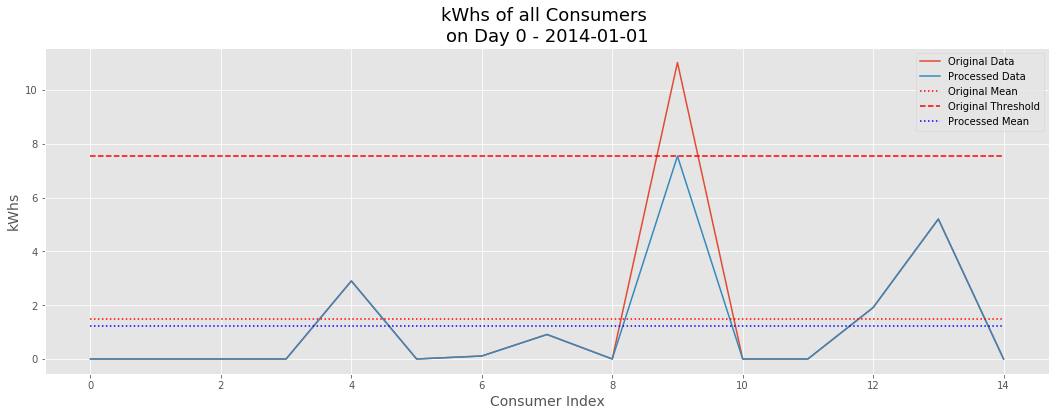

In [127]:
# Comparing the original and new kWhs
plot_daily_kWhs(original_data=kWhs, processed_data=kWhs_processed, 
                plot_mean_std=True, )

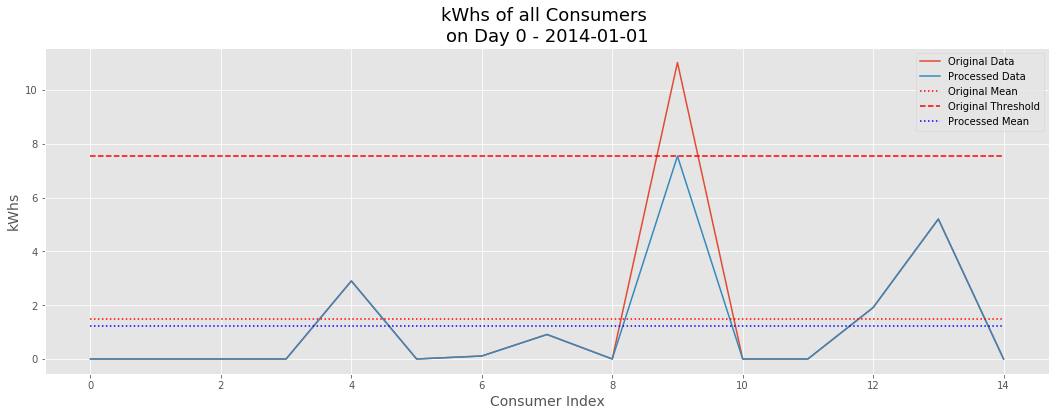

In [131]:
# Comparing the original kWhs with the results of for-loop based implementation
plot_daily_kWhs(original_data=kWhs, processed_data=kWhs_zheng.iloc[:, 2:], 
                plot_mean_std=True)

### Interpretation
- The original preprocessing notebook used a `lambda` expression to apply the Three Sigma rule on a consumer basis in order to identify and replace outliers.
- The same approach has been applied on a daily basis in this notebook using a slightly different, more expxlicit for loop.
- The results of both approaches are identical, which confirms that the approach used in the original data preprocessing gave correct results.

### Outliers by Consumer

In [132]:
 kWhs_by_consumer = kWhs.copy()

In [134]:
kWhs_by_consumer.head()

,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72


In [136]:
NUM_CONSUMERS, NUM_DAYS = kWhs_by_consumer.shape